First lets pre-process the datasets

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import numpy as np
import seaborn as sns
import data_utils
import importlib
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB





importlib.reload(data_utils)

# Read the csv
csv_awardsPlayers, csv_coaches, csv_playersTeams, csv_players, csv_seriesPost, csv_teamsPost,csv_teams = data_utils.load_data()
pd.options.mode.use_inf_as_na = True


# Change the tmID to unique IDs and also the same for the confID for all the dataframes

uniques_tmID = pd.concat([csv_teamsPost['tmID'], csv_teams['tmID'],csv_playersTeams['tmID'],csv_coaches['tmID'],csv_seriesPost['tmIDWinner'],csv_seriesPost['tmIDLoser']]).unique()
unique_confID = pd.concat([csv_teams['confID']]).unique()
unique_playoffID = pd.concat([csv_teams['playoff']]).unique()

label_tmID = LabelEncoder()
label_tmID.fit(uniques_tmID)


csv_teamsPost['tmID'] = label_tmID.transform(csv_teamsPost['tmID'])
csv_teams['tmID'] = label_tmID.transform(csv_teams['tmID'])
csv_playersTeams['tmID'] = label_tmID.transform(csv_playersTeams['tmID'])
csv_coaches['tmID'] = label_tmID.transform(csv_coaches['tmID'])
csv_seriesPost['tmIDWinner'] = label_tmID.transform(csv_seriesPost['tmIDWinner'])
csv_seriesPost['tmIDLoser'] = label_tmID.transform(csv_seriesPost['tmIDLoser'])


label_confID = LabelEncoder()
label_confID.fit(unique_confID)

csv_teams['confID'] = label_confID.transform(csv_teams['confID'])


label_playoffID = LabelEncoder()
label_playoffID.fit(unique_playoffID)

csv_teams['playoff'] = label_playoffID.transform(csv_teams['playoff'])


/var/folders/qb/xs9s2rhj0v3b60fwkgth0mgc0000gn/T/ipykernel_48916/1681913189.py:36: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.options.mode.use_inf_as_na = True


# Series Post Cleaning

In [3]:
csv_seriesPost = data_utils.setup_seriesPost(csv_seriesPost)

# Teams Cleaning

Correlation with Playoff:
rank: -6.23%
o_pf: 10.38%
o_blk: 15.85%
o_pts: 13.11%
d_dreb: 10.88%
d_pf: 11.82%
d_blk: 9.25%
d_pts: 10.79%
GP: 9.13%
min: 8.79%
winRateConf: 21.78%
winRatePost: 37.08%
o_fg_pct: 11.83%
o_ft_pct: 12.20%
o_3p_pct: 11.50%
d_fg_pct: 9.36%
d_ft_pct: 11.44%
d_3p_pct: 8.58%
o_oreb_pct: 9.75%
o_dreb_pct: 11.72%
d_oreb_pct: 10.29%
d_dreb_pct: 11.51%
asts_to_pct: 13.65%
stl_to_pct: 9.95%
d_asts_to_pct: 10.77%
d_stl_to_pct: 11.36%
post_rank: -63.20%
post_rank_cummean: -9.55%


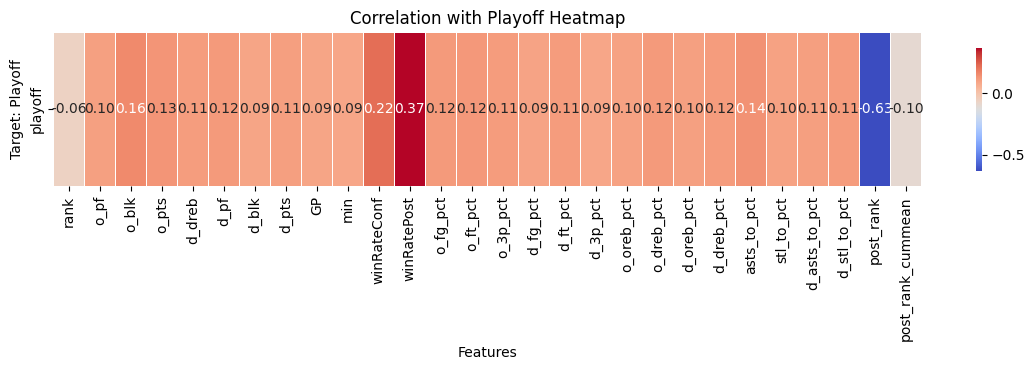

Random Forest Correlation with Playoff: 98.72%
Gradient Boosting Correlation with Playoff: 98.58%
Linear Regression Correlation with Playoff: 73.38%
Support Vector Regression Correlation with Playoff: 11.97%
Decision Tree Correlation with Playoff: 98.58%
Best Model: Random Forest with Correlation: 98.72%
Correlation with Playoff:
team_rating: 98.72%
year                 0
tmID                 0
confID               0
rank                 0
playoff              0
winRateConf          0
winRatePost          0
post_rank            0
post_rank_cummean    0
team_rating          0
dtype: int64


In [4]:
csv_teams = data_utils.setup_teams(csv_teams,csv_teamsPost)

# Check the heat map of the correlation matrix to give more weight to the features that are more correlated with the target

# Assuming csv_teams is already defined as a DataFrame
csv_teams_copy = csv_teams.copy()

# Drop the columns year, confID, tmID because they are not relevant for the target
csv_teams_copy = csv_teams_copy.drop(columns=['year', 'confID', 'tmID'])

# Step 3: Calculate correlation with the 'playoff' column
correlation_with_playoff = csv_teams_copy.corr()['playoff'].drop('playoff')  # Drop the self-correlation

# Print correlation percentages
print("Correlation with Playoff:")
for feature, correlation in correlation_with_playoff.items():
    print(f"{feature}: {correlation * 100:.2f}%")

# Step 4: Reshape for heatmap
correlation_matrix = correlation_with_playoff.values.reshape(1, -1)
features = correlation_with_playoff.index

# Step 5: Create the heatmap
plt.figure(figsize=(14, 2))  # Set the figure size
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', 
            square=False, cbar_kws={"shrink": .8}, linewidths=0.5,
            yticklabels=['playoff'], xticklabels=features)

plt.title('Correlation with Playoff Heatmap')
plt.xlabel('Features')
plt.ylabel('Target: Playoff')
plt.show()

# csv_aux = data_utils.getTeamRating(csv_teams)


csv_aux = data_utils.getTeamRating2(csv_teams)


correlation_with_playoff = csv_aux[['playoff', 'team_rating']].corr().loc['playoff'].drop('playoff')  # Drop self-correlation

print("Correlation with Playoff:")
for feature, correlation in correlation_with_playoff.items():
    print(f"{feature}: {correlation * 100:.2f}%")


csv_teams = csv_teams.drop(columns=["o_pf","o_blk","o_pts","d_dreb","d_pf","d_blk","d_pts","GP","min","o_fg_pct","o_ft_pct","o_3p_pct","d_fg_pct","d_ft_pct","d_3p_pct","o_oreb_pct","o_dreb_pct","d_oreb_pct","d_dreb_pct","asts_to_pct","stl_to_pct","d_asts_to_pct","d_stl_to_pct"])

csv_aux = csv_aux.drop(columns=["o_pf","o_blk","o_pts","d_dreb","d_pf","d_blk","d_pts","GP","min","o_fg_pct","o_ft_pct","o_3p_pct","d_fg_pct","d_ft_pct","d_3p_pct","o_oreb_pct","o_dreb_pct","d_oreb_pct","d_dreb_pct","asts_to_pct","stl_to_pct","d_asts_to_pct","d_stl_to_pct"])

csv_teams = csv_aux

print(csv_teams.isnull().sum())

In [5]:
# Check for missing values in each column of the csv_teams dataframe
missing_values = csv_teams.isnull().sum()

# Display the missing values
for column, missing in missing_values.items():
    print(f"{column}: {missing}")

year: 0
tmID: 0
confID: 0
rank: 0
playoff: 0
winRateConf: 0
winRatePost: 0
post_rank: 0
post_rank_cummean: 0
team_rating: 0


There are missing values on the firstRound, semis and finals columns. However this missing values are supposed to exist, since they indicate that a team has never made it to respective round. There is no need to replace these missing values.

## Players Cleaning

- Remove Columns : first season and last season;
- Remove Players that are not assigned to any team; 
- Predict the weight and the height of the players that have that attribute missing;

In [6]:
csv_players = data_utils.setup_players(csv_players,csv_playersTeams)
# csv_players = data_utils.setup_players_mean(csv_players)
csv_players = data_utils.setup_players_algorithm(csv_players)
print(csv_players.isnull().sum())

Number of missing weights: 6
KNN model average MSE: 232.9763616346956
LinearRegression model average MSE: 318.7127678257158
DecisionTree model average MSE: 240.49738377043906
RandomForest model average MSE: 230.42719665599597
Best model selected: RandomForestRegressor(random_state=42)
Best tree depth: 3
Number of weights predicted: 6
bioID             0
pos               0
height            0
weight            0
college          77
collegeOther    550
birthDate         0
deathDate         0
dtype: int64


/Users/eteka/Documents/school/MachineLearning/data_utils.py:328: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[196.82174314 158.98382531 151.64628052 196.82174314 184.05553771
 169.36091628]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  csv_players.loc[csv_players['weight'] == 0, 'weight'] = predicted_weights


# Players Teams Cleaning

- Remove lgID (is always the same) 
- Remove players that haven't played a single game


In [7]:
csv_playersTeams = data_utils.setup_playersTeams(csv_playersTeams,csv_awardsPlayers)

# Sort the csv_playersTeams by year and tmID and then playerID

csv_playersTeams = csv_playersTeams.sort_values(['year','tmID','playerID'])

csv_playersRating = data_utils.getPlayerRating(csv_playersTeams,csv_players,csv_teams)

#Check the distinct values of the stint column
print(csv_playersTeams.isnull().sum())

/Users/eteka/Documents/school/MachineLearning/data_utils.py:624: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['player_rating'] = model.predict(X)


Random Forest Correlation with Playoff: 65.52%


/Users/eteka/Documents/school/MachineLearning/data_utils.py:624: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['player_rating'] = model.predict(X)
/Users/eteka/Documents/school/MachineLearning/data_utils.py:624: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['player_rating'] = model.predict(X)
/Users/eteka/Documents/school/MachineLearning/data_utils.py:624: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

Gradient Boosting Correlation with Playoff: 49.29%
Linear Regression Correlation with Playoff: 14.72%
Support Vector Regression Correlation with Playoff: 9.82%
Decision Tree Correlation with Playoff: 63.92%
Best Model: Random Forest with Correlation: 65.52%
playerID              0
year                  0
stint                 0
tmID                  0
GP                    0
GS                    0
minutes               0
points                0
oRebounds             0
dRebounds             0
rebounds              0
assists               0
steals                0
blocks                0
turnovers             0
PF                    0
fgAttempted           0
fgMade                0
ftAttempted           0
ftMade                0
threeAttempted        0
threeMade             0
dq                    0
PostGP                0
PostGS                0
PostMinutes           0
PostPoints            0
PostoRebounds         0
PostdRebounds         0
PostRebounds          0
PostAssists           

# Coaches Cleaning

- Remove the coaches that have 0 wins and 0 losses (this means that the coach havent managed a single game)

In [8]:
csv_coaches = data_utils.setup_coaches(csv_coaches)
csv_coaches.head(100)

,coachID,year,tmID,lgID,stint,winRateConf,winRatePost
0,adamsmi01w,5,19,WNBA,0,0.000000,0.000000
1,adubari99w,1,11,WNBA,0,0.000000,0.000000
2,adubari99w,2,11,WNBA,0,0.000000,0.000000
3,adubari99w,3,11,WNBA,0,0.640625,0.538462
4,adubari99w,4,11,WNBA,0,0.609375,0.500000
...,...,...,...,...,...,...,...
95,laceytr99w,4,1,WNBA,0,0.000000,0.000000
96,laceytr99w,5,1,WNBA,0,0.000000,0.000000
97,laceytr99w,6,1,WNBA,1,0.500000,0.000000
98,laimbbi01w,3,5,WNBA,2,0.000000,0.000000


# Awards Players Cleaning

- Remove the lgID column
- Prevent the error by putting the name in lower case

In [9]:
csv_awardsPlayers = data_utils.setup_awardsPlayers(csv_awardsPlayers)

csv_awardsPlayers['normalized_award'] = csv_awardsPlayers['award'].apply(data_utils.normalize_award_name)

csv_awardsPlayers['award'] = csv_awardsPlayers['normalized_award']

csv_awardsPlayers = csv_awardsPlayers.drop(columns=['normalized_award'])
# Display the updated dataframe
print(csv_awardsPlayers.isnull().sum())

# Check the distinct values of the csv_awardsPlayers
print(csv_awardsPlayers['award'].unique())

playerID    0
award       0
year        0
dtype: int64
['all-star game most valuable player' 'coach of the year'
 'defensive player of the year' 'kim perrot sportsmanship award'
 'most improved player' 'most valuable player' 'rookie of the year'
 'sixth woman of the year' 'wnba finals most valuable player'
 'wnba all-decade team' 'wnba all decade team honorable mention']


# Prepare to Merge the data

## Get the ratings of the  players per season

In [10]:
# Get from the csv_playersTeams the rating per player for that season based on the following columns 

# players_statistics = ['GP','minutes','points', 'oRebounds', 'dRebounds', 'rebounds', 'assists', 'steals','blocks', 'turnovers', 'PF', 'fgAttempted', 'fgMade', 'ftAttempted', 'ftMade', 'threeAttempted', 'threeMade', 'dq']

# Get the rating per player for that season
csv_playersRatings = data_utils.get_rating_per_player(csv_playersTeams,csv_players)


## Get the ratings of the squad from the players rating

In [11]:
# From the csv_playersRatings order the csv per season and per team 


# csv_playersRatings_sorted = csv_playersRatings.sort_values(['tmID', 'year','rating_player', 'playerID'])


# csv_teamsRating = data_utils.get_rating_per_team(csv_playersRatings_sorted,csv_teams)

# csv_teamsRating_sorted = csv_teamsRating.sort_values(['year', 'rating_team','tmID','confID'])

# Normalize the rating of the teams between 1 and 99
# csv_teamsRating_sorted['rating_team'] = (csv_teamsRating_sorted['rating_team'] - csv_teamsRating_sorted['rating_team'].min()) / (csv_teamsRating_sorted['rating_team'].max() - csv_teamsRating_sorted['rating_team'].min()) * 98 + 1


# Get the coaches rating by their performance 



In [12]:
# csv_coachesRating = data_utils.get_rating_per_coach(csv_coaches, csv_teams)

#normalize the rating between 0 and 99

# csv_coachesRating['rating_coach'] = (csv_coachesRating['rating_coach'] - csv_coachesRating['rating_coach'].min()) / (csv_coachesRating['rating_coach'].max() - csv_coachesRating['rating_coach'].min()) * 99

csv_coachesRating = data_utils.getCoachRating(csv_coaches,csv_teams)

Random Forest Correlation with Playoff: 52.85%
Gradient Boosting Correlation with Playoff: 53.04%
Linear Regression Correlation with Playoff: 23.53%
Support Vector Regression Correlation with Playoff: 26.21%
Decision Tree Correlation with Playoff: 52.76%
Best Model: Gradient Boosting with Correlation: 53.04%


/Users/eteka/Documents/school/MachineLearning/data_utils.py:99: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['coach_rating'] = model.predict(X)
/Users/eteka/Documents/school/MachineLearning/data_utils.py:99: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['coach_rating'] = model.predict(X)
/Users/eteka/Documents/school/MachineLearning/data_utils.py:99: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

# First baseline model

In [13]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor, VotingClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from joblib import Parallel, delayed


features = [['coach_rating', 'team_rating']]

# Merging the data for coaches, teams, and players
csv_merged = pd.merge(csv_coachesRating, csv_teams, on=['tmID', 'year'], how='left')
csv_merged_aux = csv_merged[['tmID', 'year', 'coach_rating', 'team_rating', 'playoff', 'confID']]

# Get the top 10 players for each team
top10_players = csv_playersRatings.groupby(['tmID', 'year']).apply(lambda x: x.nlargest(10, 'rating_player')).reset_index(drop=True)

# Calculate the mean of the top 10 players' ratings for each team
top10_mean = top10_players.groupby(['tmID', 'year'])['rating_player'].mean().reset_index(name='top10_mean')

# Merge the top10_mean into the csv_merged_aux DataFrame
csv_merged_aux = csv_merged_aux.merge(top10_mean, on=['tmID', 'year'], how='left')

csv_merged_aux = csv_merged_aux.groupby(['year','tmID']).last().reset_index()

csv_merged_aux.to_csv('merged_aux_help.csv')

# Replace the name of the column 'top10_mean' with 'squad_rating'
csv_merged_aux.rename(columns={'top10_mean': 'squad_rating'}, inplace=True)

# Define models for each rating prediction
team_model = LinearRegression()
coach_model = LinearRegression()
# squad_model = MLPRegressor()

# Prepare datasets
train = csv_merged_aux[(csv_merged_aux['year'] > 0) & (csv_merged_aux['year'] < 8)].sort_values(['tmID', 'year'])
test = csv_merged_aux[csv_merged_aux['year'] == 8]
test = test[['year','tmID','confID','playoff']]

x_train_previous = train[['year', 'tmID']]
y_train_previous = train[['team_rating', 'coach_rating', 'squad_rating']]
train.to_csv('ratings_before.csv', index=False)
x_test_previous = test[['year', 'tmID']]

# Initialize the columns team_rating, coach_rating, and squad_rating
test['team_rating'] = 0
test['coach_rating'] = 0
test['squad_rating'] = csv_merged_aux['squad_rating']
# test['squad_rating'] = 0
y_test_previous = test[['team_rating', 'coach_rating']]

# Prepare classifiers for playoff prediction
classifiers = {
    'KNN': KNeighborsClassifier(),
    'DecisionTree': DecisionTreeClassifier(),
    'RandomForest': RandomForestClassifier(),
    'SVC': SVC(probability=True),
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'GradientBoosting': GradientBoostingClassifier(),
}

# Initialize a dictionary to store final results
results = []

best_manual_accuracy = 0

# Reduce grid search space for efficiency
param_grid = {
    'KNN': {'n_neighbors': [3, 5], 'weights': ['uniform']},
    'DecisionTree': {'max_depth': [None, 10], 'min_samples_split': [2, 5]},
    'RandomForest': {'n_estimators': [100], 'max_depth': [None, 10]},
    'SVC': {'C': [1], 'kernel': ['linear'], 'gamma': ['scale']},
    'LogisticRegression': {'C': [1]},
    'GradientBoosting': {'n_estimators': [100], 'learning_rate': [0.1], 'max_depth': [3]},
    'NeuralNetwork': {'hidden_layer_sizes': [(50,), (100,)], 'activation': ['relu', 'tanh'], 'solver': ['adam'], 'max_iter': [200, 500]},
}

# Predict ratings for the test set
team_model.fit(x_train_previous, y_train_previous['team_rating'])
test['team_rating'] = team_model.predict(x_test_previous)

coach_model.fit(x_train_previous, y_train_previous['coach_rating'])
test['coach_rating'] = coach_model.predict(x_test_previous)

# squad_model.fit(x_train_previous, y_train_previous['squad_rating'])
# test['squad_rating'] = squad_model.predict(x_test_previous)

test = test.sort_values(['tmID', 'year'])

# Prepare features and target for playoff prediction
x_test = test[['year','tmID','team_rating', 'coach_rating', 'confID', 'squad_rating']]
y_test = test['playoff']
x_train = train[['year','tmID','team_rating','coach_rating', 'confID', 'squad_rating']]
y_train = train['playoff']

# Perform grid search on classifiers using parallel processing
def grid_search(clf_name, clf):
    grid_search = GridSearchCV(clf, param_grid[clf_name], cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(x_train, y_train)
    return clf_name, grid_search.best_estimator_

# Perform grid search on classifiers in parallel
best_classifiers = dict(Parallel(n_jobs=-1)(delayed(grid_search)(clf_name, clf) for clf_name, clf in classifiers.items()))

# Create a VotingClassifier with the tuned classifiers
voting_clf = VotingClassifier(estimators=[
    ('KNN', best_classifiers['KNN']),
    ('DecisionTree', best_classifiers['DecisionTree']),
    ('RandomForest', best_classifiers['RandomForest']),
    ('SVC', best_classifiers['SVC']),
    ('LogisticRegression', best_classifiers['LogisticRegression']),
    ('GradientBoosting', best_classifiers['GradientBoosting'])
], voting='soft')  # 'soft' voting uses predicted probabilities

# Fit the voting classifier
voting_clf.fit(x_train, y_train)

# Predict playoff using the ensemble classifier
y_prob = voting_clf.predict_proba(x_test)[:, 1]

# Normalize probabilities so that their sum equals 8 TP2-delivery
y_prob = (y_prob / y_prob.sum()) * 8
test['playoff_prob'] = y_prob

# Sort and rank for playoff prediction
# test = test.sort_values('playoff_prob', ascending=False)
test['predicted_playoff'] = test.groupby('confID')['playoff_prob'].rank(ascending=False, method='first') <= 4
test['predicted_playoff'] = test['predicted_playoff'].astype(int)

# Calculate accuracy
accuracy_score_value = accuracy_score(y_test, test['predicted_playoff'])
y_test.to_csv('y_test.csv', index=False)
test['predicted_playoff'].to_csv('predicted_playoff_check.csv', index=False)
manual_accuracy = (test['playoff'] == test['predicted_playoff']).mean() * 100

# Store results for each setup
results.append({
    'TeamModel': 'RandomForest',
    'CoachModel': 'NeuralNetwork',
    'SquadModel': 'NeuralNetwork',
    'PlayoffModel': 'Ensemble',
    'AccuracyScore': accuracy_score_value * 100,
    'ManualAccuracy': manual_accuracy
})

if manual_accuracy > best_manual_accuracy:
    best_manual_accuracy = manual_accuracy
    best_team_model = 'RandomForest'
    best_coach_model = 'NeuralNetwork'
    best_squad_model = 'NeuralNetwork'
    best_clf = 'Ensemble'
    output = test.copy()

# Convert results to DataFrame for easier analysis
results_df = pd.DataFrame(results)
results_df.sort_values(by=['ManualAccuracy', 'AccuracyScore'], ascending=False, inplace=True)
results_df.to_csv('model_combinations_results.csv', index=False)

# Display results
print("Model combinations and their accuracies have been saved to 'model_combinations_results.csv'")
print(results_df.sort_values(by=['ManualAccuracy', 'AccuracyScore'], ascending=False))

# Display the best model
print(f"Best model: {best_team_model}, {best_coach_model}, {best_squad_model}, {best_clf} with manual accuracy of {best_manual_accuracy:.2f}%")
output = output[['tmID','confID','playoff','playoff_prob','predicted_playoff']]

# Please display the tmID string instead of the tmID number
output['tmIDString'] = label_tmID.inverse_transform(output['tmID'])
output = output[['tmIDString','confID','playoff','playoff_prob','predicted_playoff']]
output.sort_values('playoff_prob', ascending=False)
output.to_csv('output.csv', index=False)


/var/folders/qb/xs9s2rhj0v3b60fwkgth0mgc0000gn/T/ipykernel_48916/3958158060.py:19: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top10_players = csv_playersRatings.groupby(['tmID', 'year']).apply(lambda x: x.nlargest(10, 'rating_player')).reset_index(drop=True)


Model combinations and their accuracies have been saved to 'model_combinations_results.csv'
      TeamModel     CoachModel     SquadModel PlayoffModel  AccuracyScore  \
0  RandomForest  NeuralNetwork  NeuralNetwork     Ensemble      69.230769   

   ManualAccuracy  
0       69.230769  
Best model: RandomForest, NeuralNetwork, NeuralNetwork, Ensemble with manual accuracy of 69.23%


# Make Plots to show classifiers results

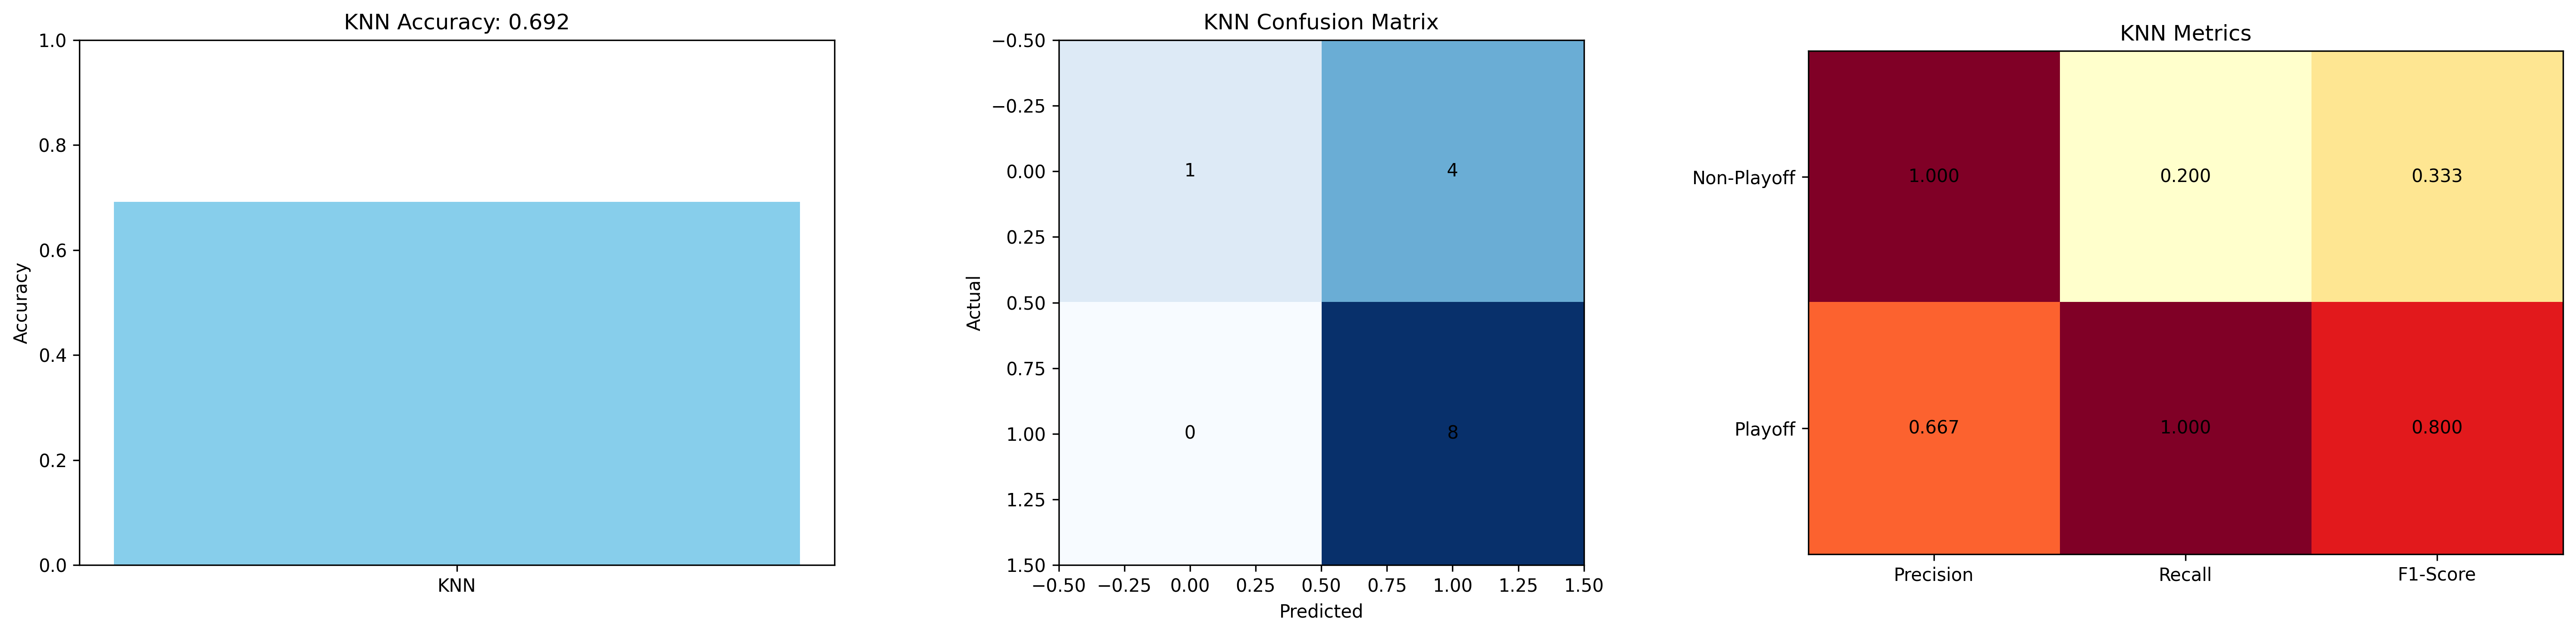

/Users/eteka/Documents/school/MachineLearning/env/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/eteka/Documents/school/MachineLearning/env/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/eteka/Documents/school/MachineLearning/env/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

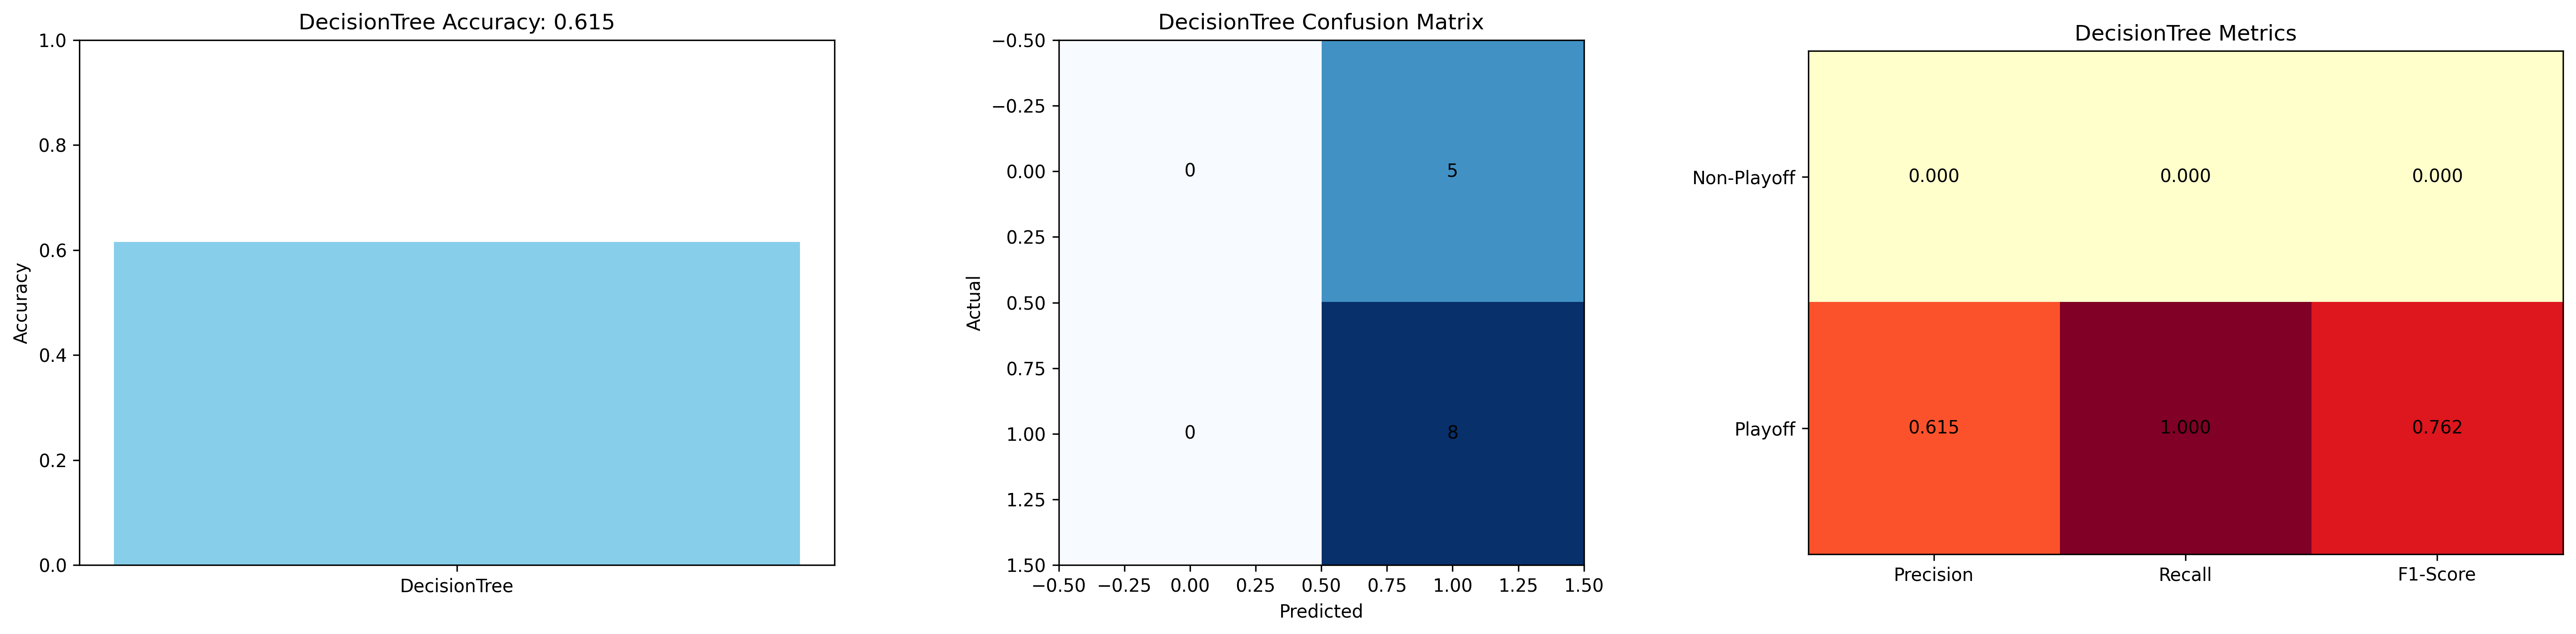

/Users/eteka/Documents/school/MachineLearning/env/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/eteka/Documents/school/MachineLearning/env/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/eteka/Documents/school/MachineLearning/env/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

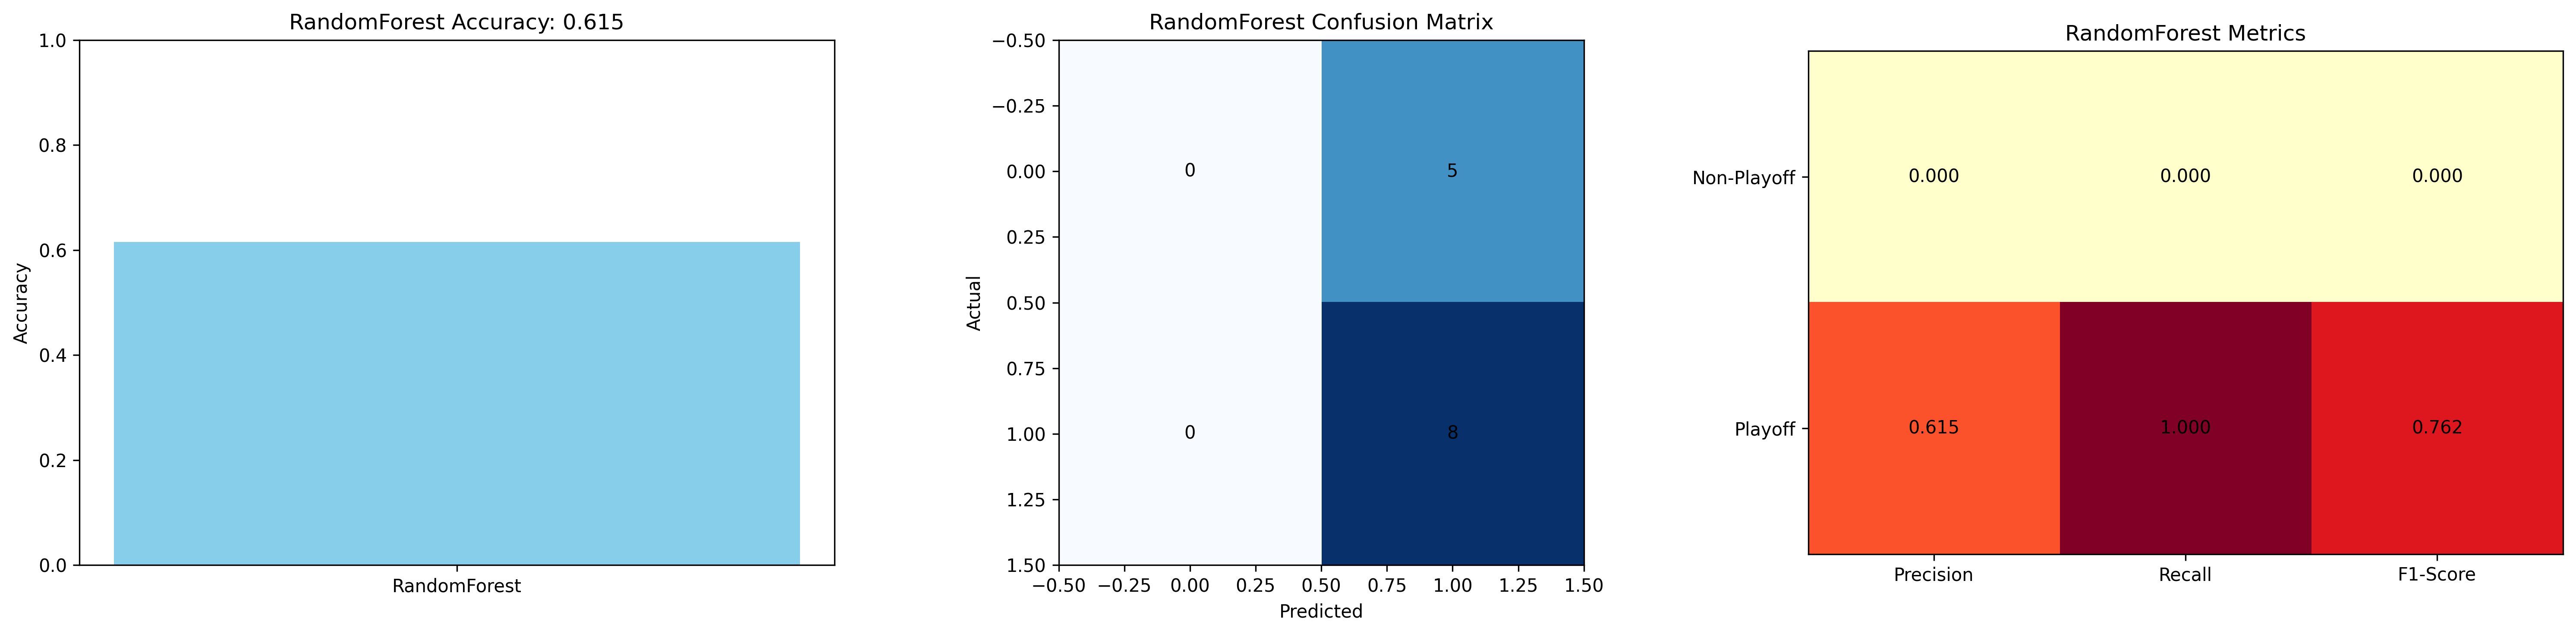

/Users/eteka/Documents/school/MachineLearning/env/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/eteka/Documents/school/MachineLearning/env/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/eteka/Documents/school/MachineLearning/env/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

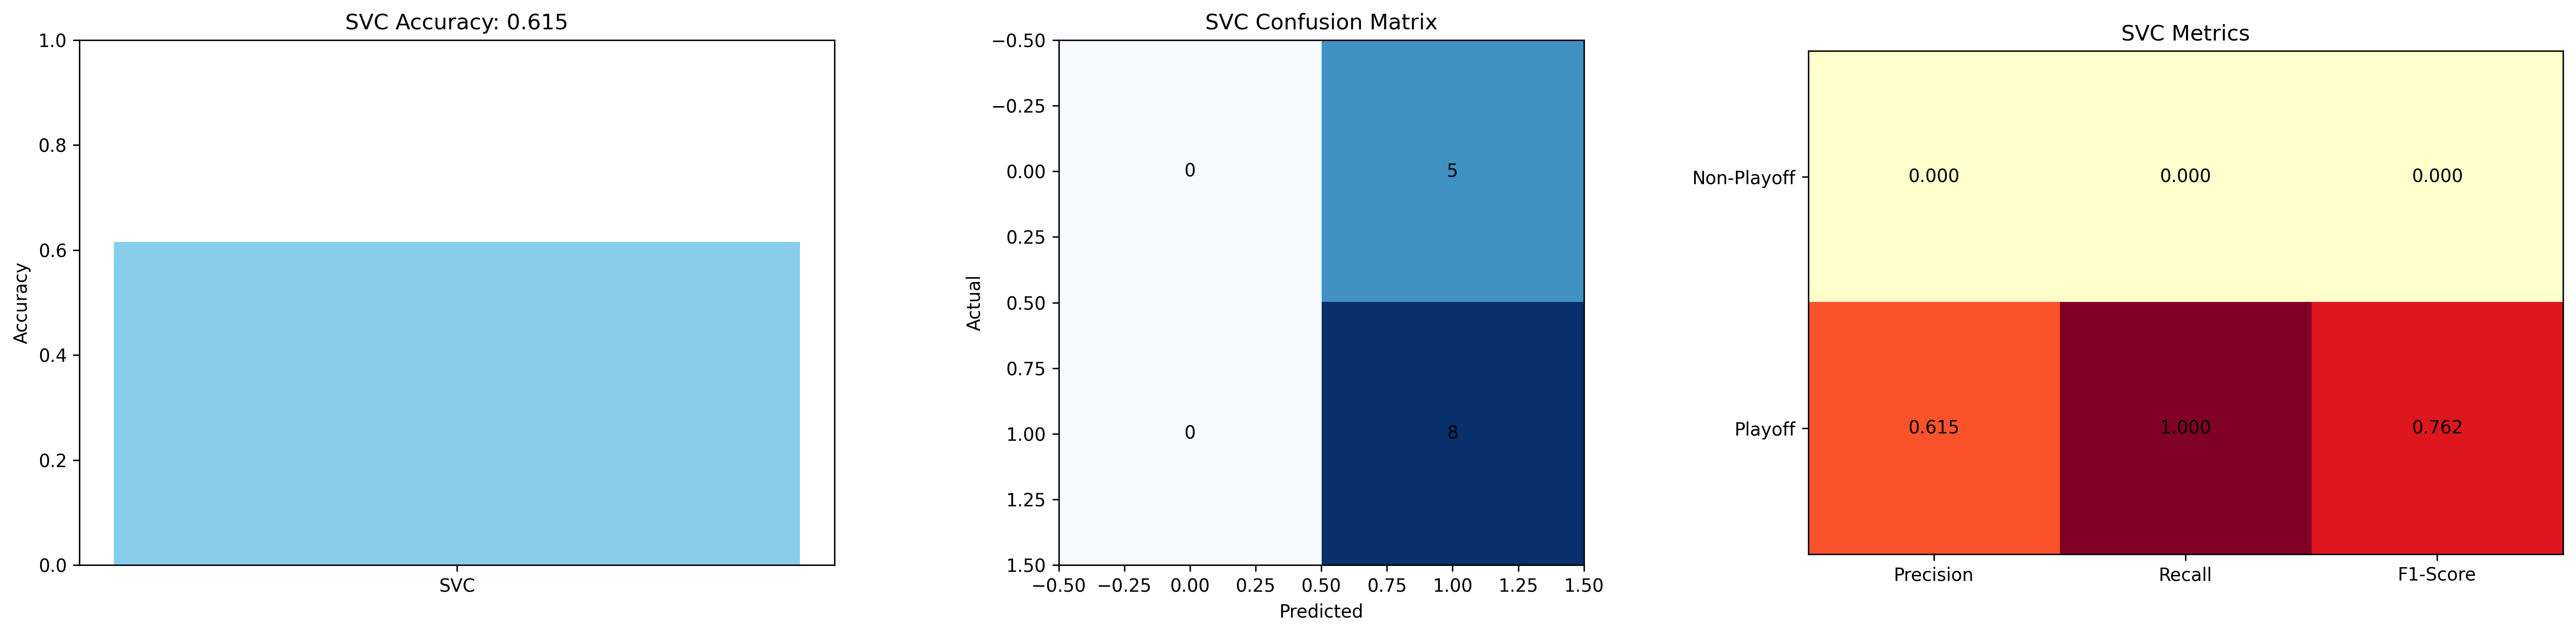

/Users/eteka/Documents/school/MachineLearning/env/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/eteka/Documents/school/MachineLearning/env/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/eteka/Documents/school/MachineLearning/env/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

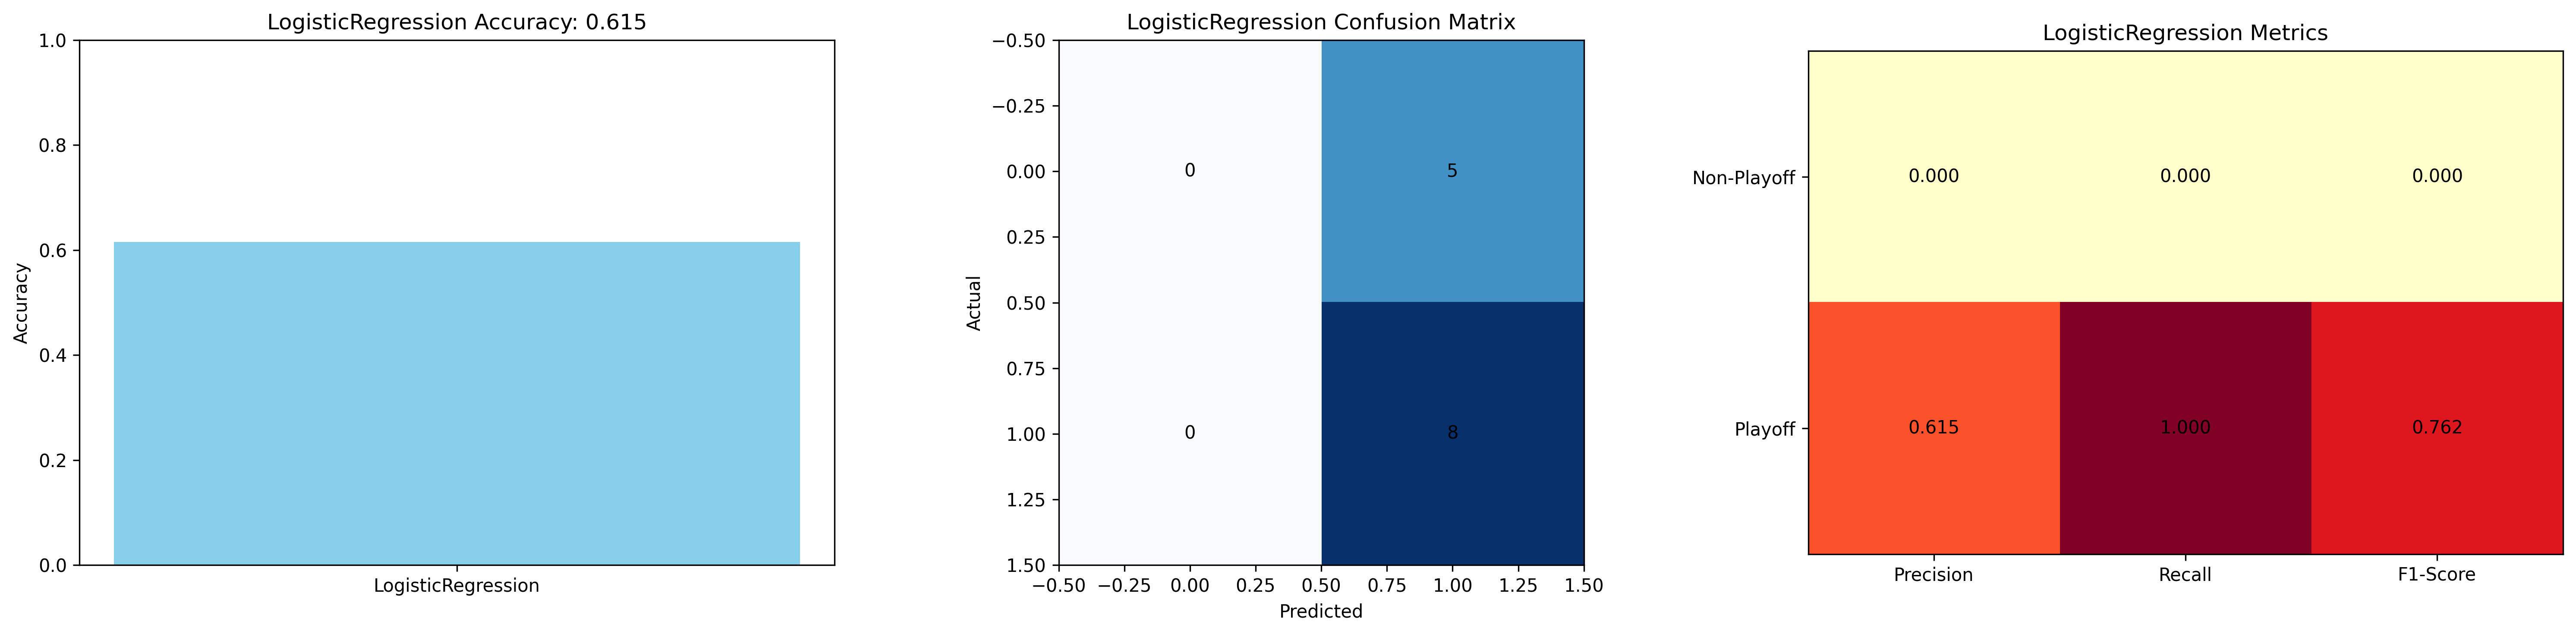

/Users/eteka/Documents/school/MachineLearning/env/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/eteka/Documents/school/MachineLearning/env/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/eteka/Documents/school/MachineLearning/env/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

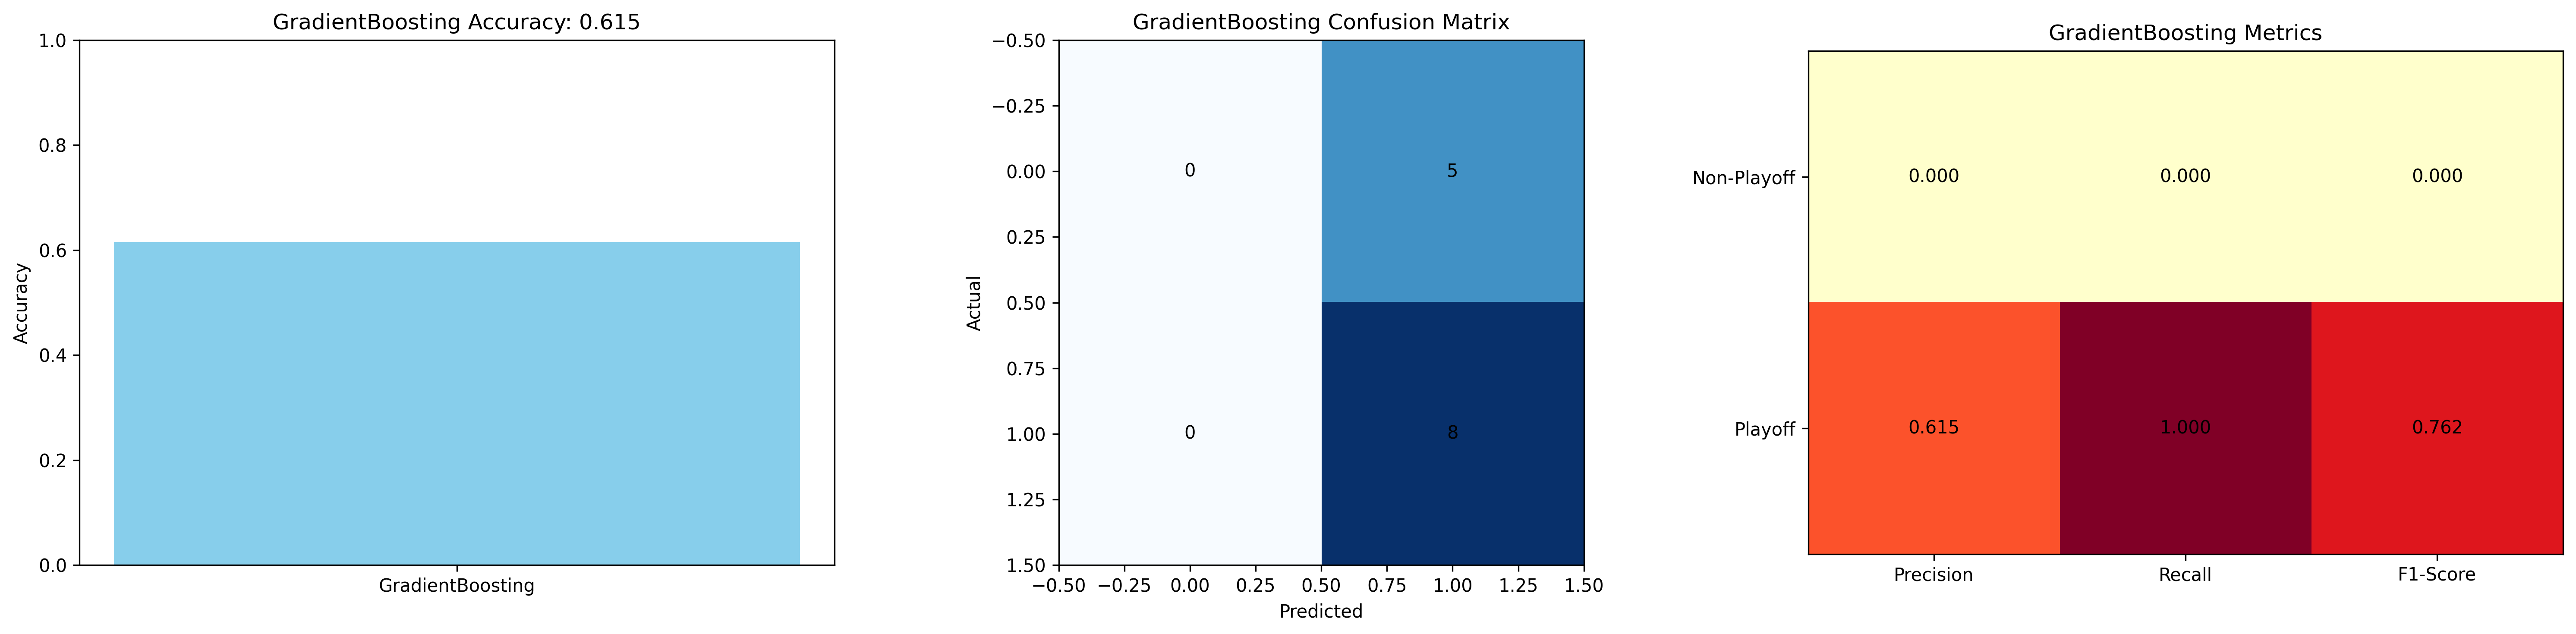

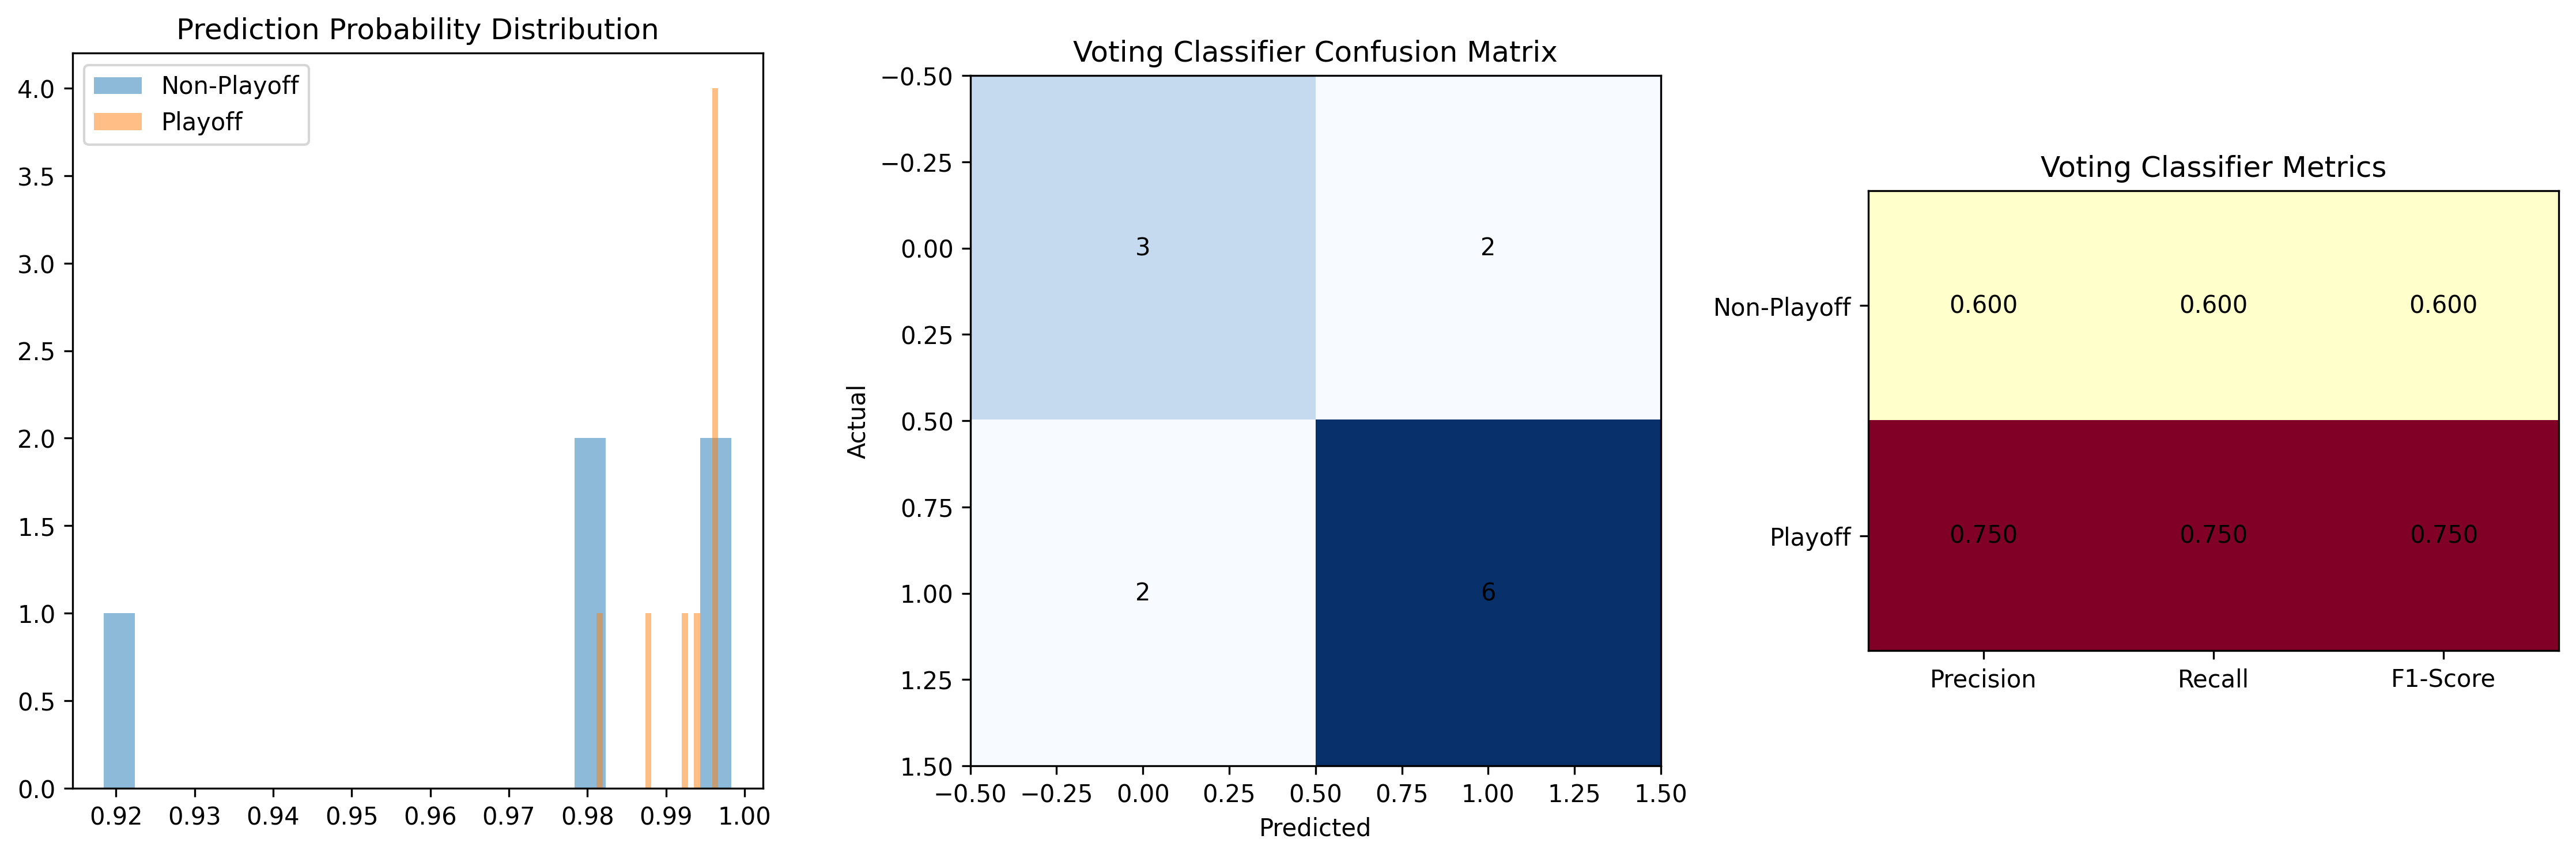

In [14]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def plot_classifier_results(voting_clf, classifiers, x_train, y_train, x_test, y_test, test):
    # Set basic parameters
    plt.rcParams['figure.figsize'] = [20, 5]
    plt.rcParams['figure.dpi'] = 300
    
    # Individual classifiers
    for name, clf in classifiers.items():
        fig = plt.figure()
        
        # Fit and predict
        clf.fit(x_train, y_train)
        y_pred = clf.predict(x_test)
        conf_matrix = confusion_matrix(y_test, y_pred)
        clf_report = classification_report(y_test, y_pred, output_dict=True)
        accuracy = accuracy_score(y_test, y_pred)
        
        # Subplots
        ax1 = fig.add_subplot(131)
        ax2 = fig.add_subplot(132)
        ax3 = fig.add_subplot(133)
        
        # Accuracy bar plot
        ax1.bar([name], [accuracy], color='skyblue')
        ax1.set_ylim([0, 1])
        ax1.set_ylabel('Accuracy')
        ax1.set_title(f'{name} Accuracy: {accuracy:.3f}')
        
        # Confusion Matrix
        im2 = ax2.imshow(conf_matrix, cmap='Blues')
        ax2.set_title(f'{name} Confusion Matrix')
        ax2.set_xlabel('Predicted')
        ax2.set_ylabel('Actual')
        # Add numbers to confusion matrix
        for i in range(conf_matrix.shape[0]):
            for j in range(conf_matrix.shape[1]):
                ax2.text(j, i, conf_matrix[i, j],
                        ha="center", va="center")
        
        # Metrics
        metrics_df = pd.DataFrame({
            'Precision': [clf_report[str(i)]['precision'] for i in range(2)],
            'Recall': [clf_report[str(i)]['recall'] for i in range(2)],
            'F1-Score': [clf_report[str(i)]['f1-score'] for i in range(2)]
        }, index=['Non-Playoff', 'Playoff'])
        
        im3 = ax3.imshow(metrics_df.values, cmap='YlOrRd')
        ax3.set_title(f'{name} Metrics')
        ax3.set_xticks(range(len(metrics_df.columns)))
        ax3.set_yticks(range(len(metrics_df.index)))
        ax3.set_xticklabels(metrics_df.columns)
        ax3.set_yticklabels(metrics_df.index)
        # Add numbers to metrics
        for i in range(len(metrics_df.index)):
            for j in range(len(metrics_df.columns)):
                ax3.text(j, i, f'{metrics_df.iloc[i, j]:.3f}',
                        ha="center", va="center")
        
        plt.tight_layout()
        plt.show()
    
    # Voting classifier results
    fig_voting = plt.figure(figsize=(15, 5))
    
    # Probability Distribution
    ax1 = fig_voting.add_subplot(131)
    y_prob = voting_clf.predict_proba(x_test)[:, 1]
    ax1.hist(y_prob[y_test == 0], bins=20, alpha=0.5, label='Non-Playoff')
    ax1.hist(y_prob[y_test == 1], bins=20, alpha=0.5, label='Playoff')
    ax1.set_title('Prediction Probability Distribution')
    ax1.legend()
    
    # Voting Confusion Matrix
    ax2 = fig_voting.add_subplot(132)
    voting_conf_matrix = confusion_matrix(y_test, test['predicted_playoff'])
    im2 = ax2.imshow(voting_conf_matrix, cmap='Blues')
    ax2.set_title('Voting Classifier Confusion Matrix')
    ax2.set_xlabel('Predicted')
    ax2.set_ylabel('Actual')
    # Add numbers
    for i in range(voting_conf_matrix.shape[0]):
        for j in range(voting_conf_matrix.shape[1]):
            ax2.text(j, i, voting_conf_matrix[i, j],
                    ha="center", va="center")
    
    # Voting Metrics
    ax3 = fig_voting.add_subplot(133)
    voting_report = classification_report(y_test, test['predicted_playoff'], output_dict=True)
    voting_metrics = pd.DataFrame({
        'Precision': [voting_report[str(i)]['precision'] for i in range(2)],
        'Recall': [voting_report[str(i)]['recall'] for i in range(2)],
        'F1-Score': [voting_report[str(i)]['f1-score'] for i in range(2)]
    }, index=['Non-Playoff', 'Playoff'])
    
    im3 = ax3.imshow(voting_metrics.values, cmap='YlOrRd')
    ax3.set_title('Voting Classifier Metrics')
    ax3.set_xticks(range(len(voting_metrics.columns)))
    ax3.set_yticks(range(len(voting_metrics.index)))
    ax3.set_xticklabels(voting_metrics.columns)
    ax3.set_yticklabels(voting_metrics.index)
    # Add numbers
    for i in range(len(voting_metrics.index)):
        for j in range(len(voting_metrics.columns)):
            ax3.text(j, i, f'{voting_metrics.iloc[i, j]:.3f}',
                    ha="center", va="center")
    
    plt.tight_layout()
    plt.show()

# Make plots and display them
plot_classifier_results(
    voting_clf=voting_clf,
    classifiers=classifiers,
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test,
    test=test
)

# Signs of overfitting in classifiers

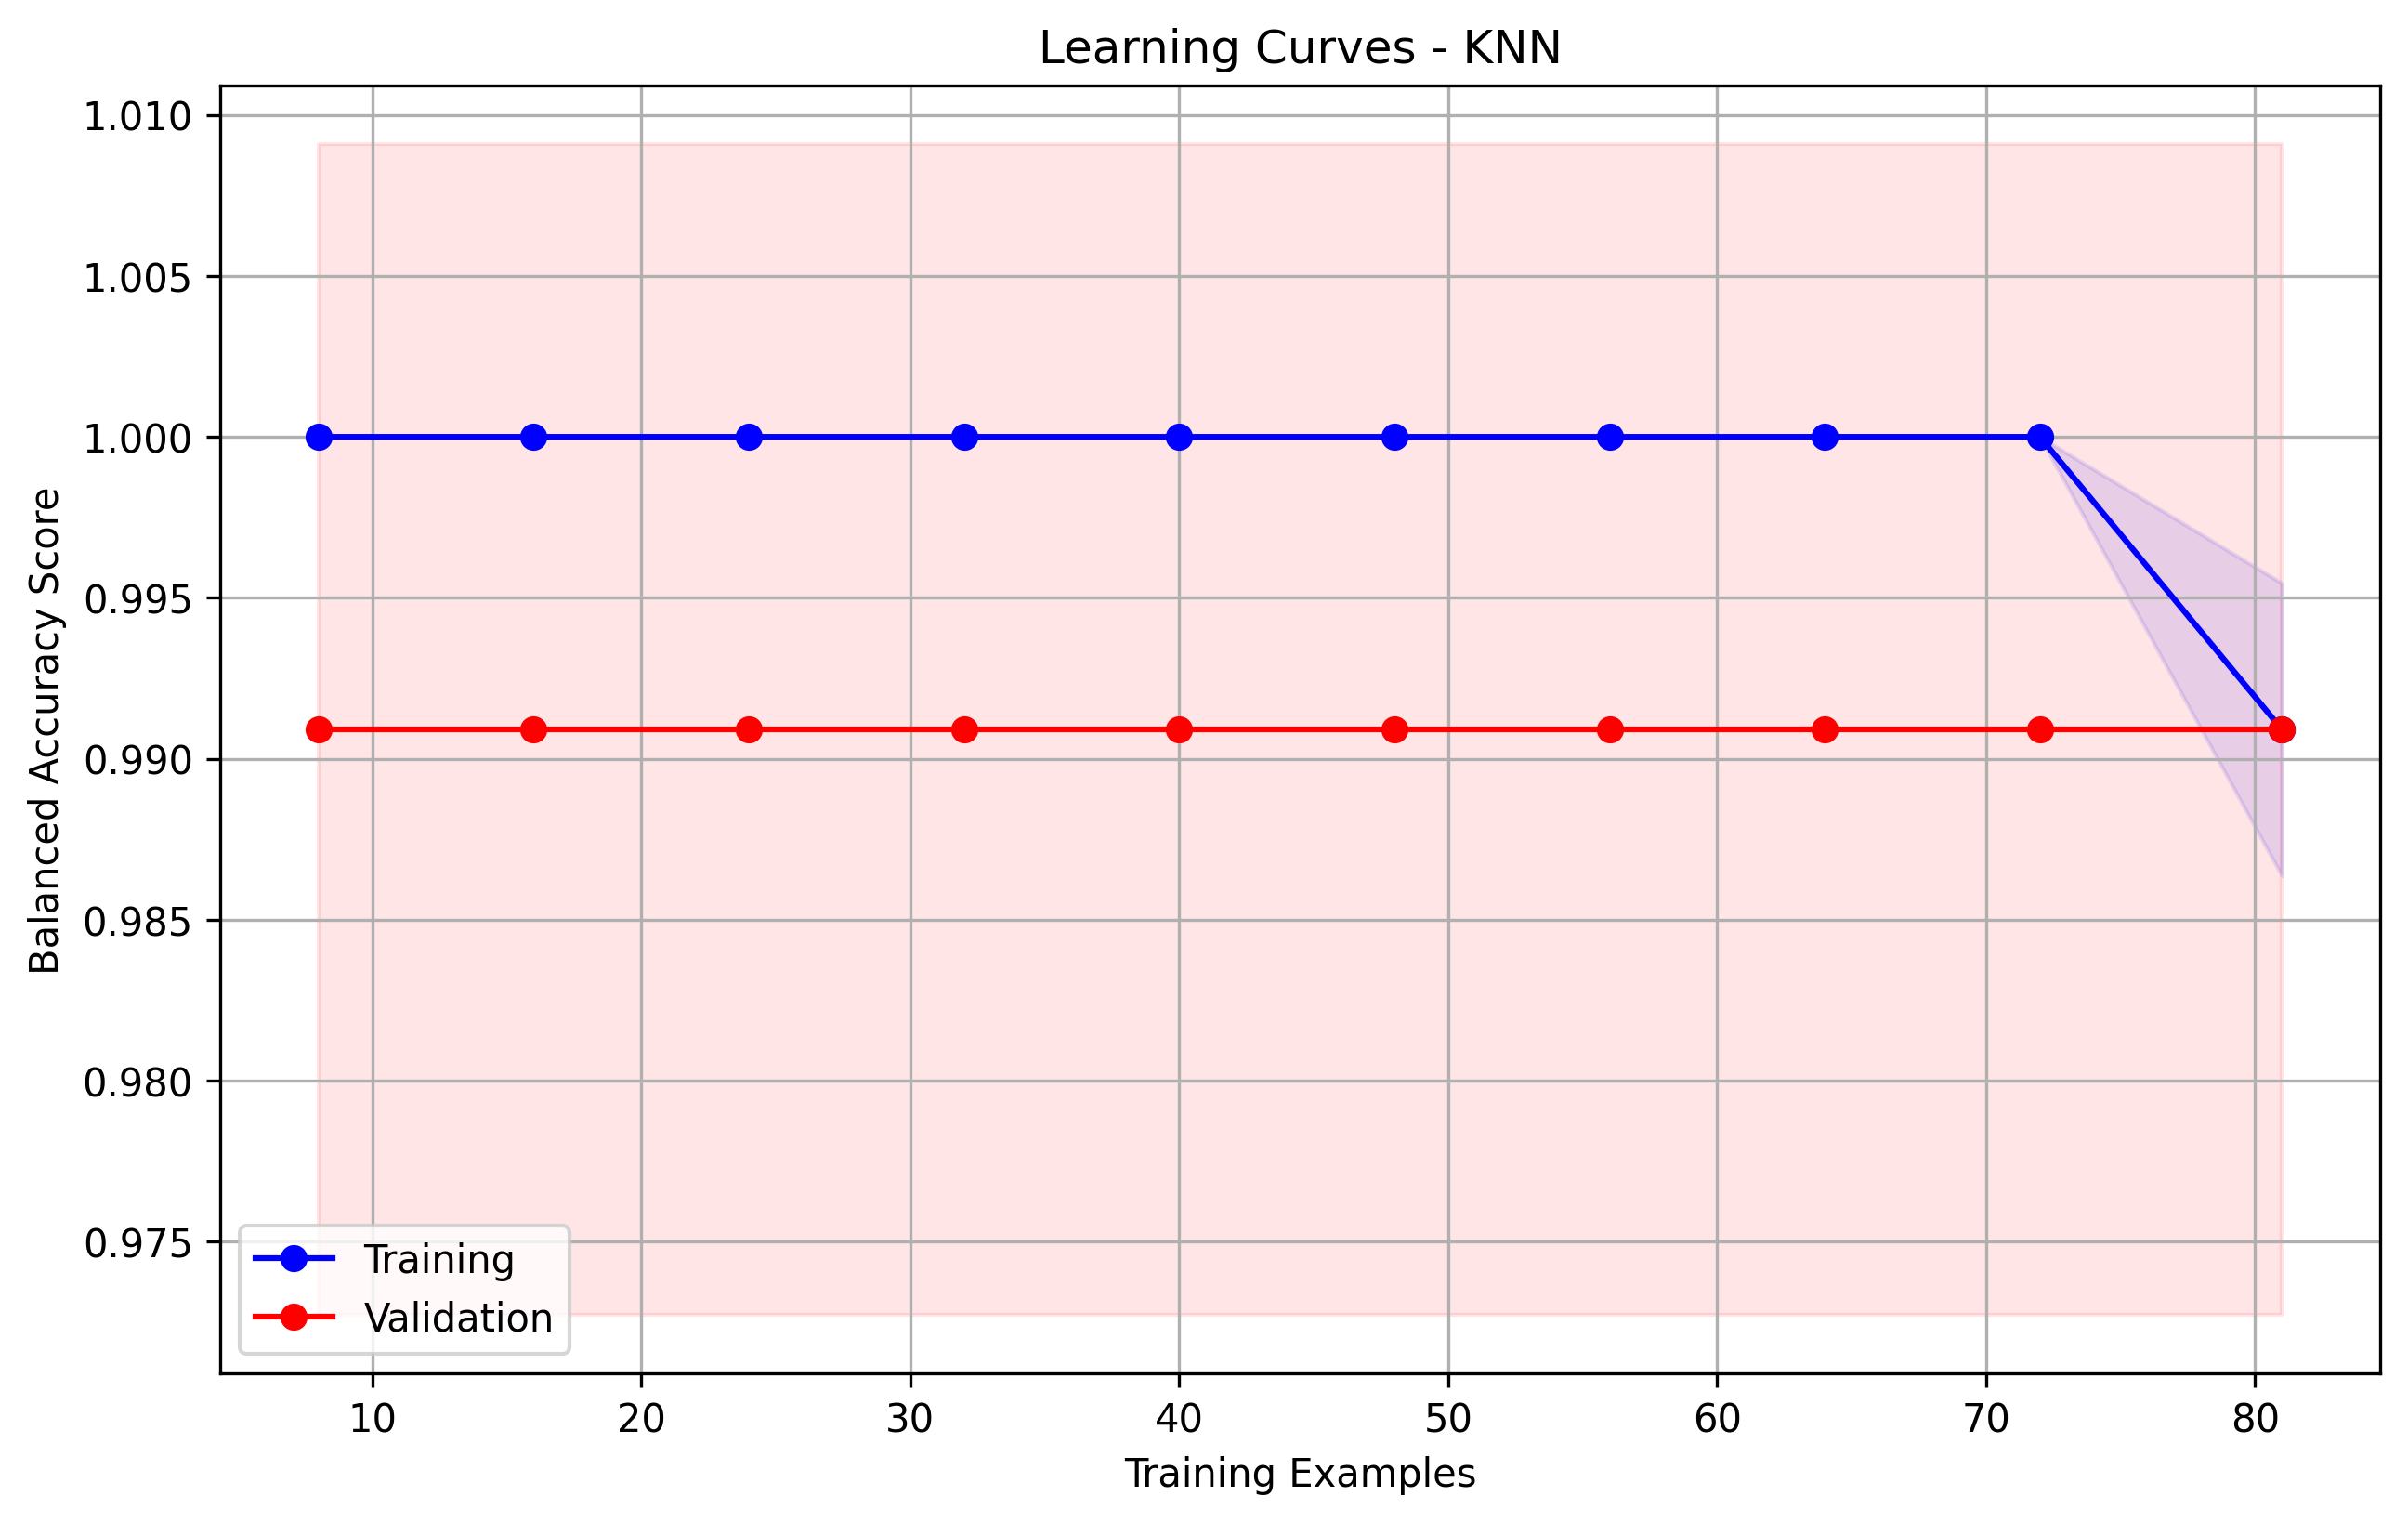

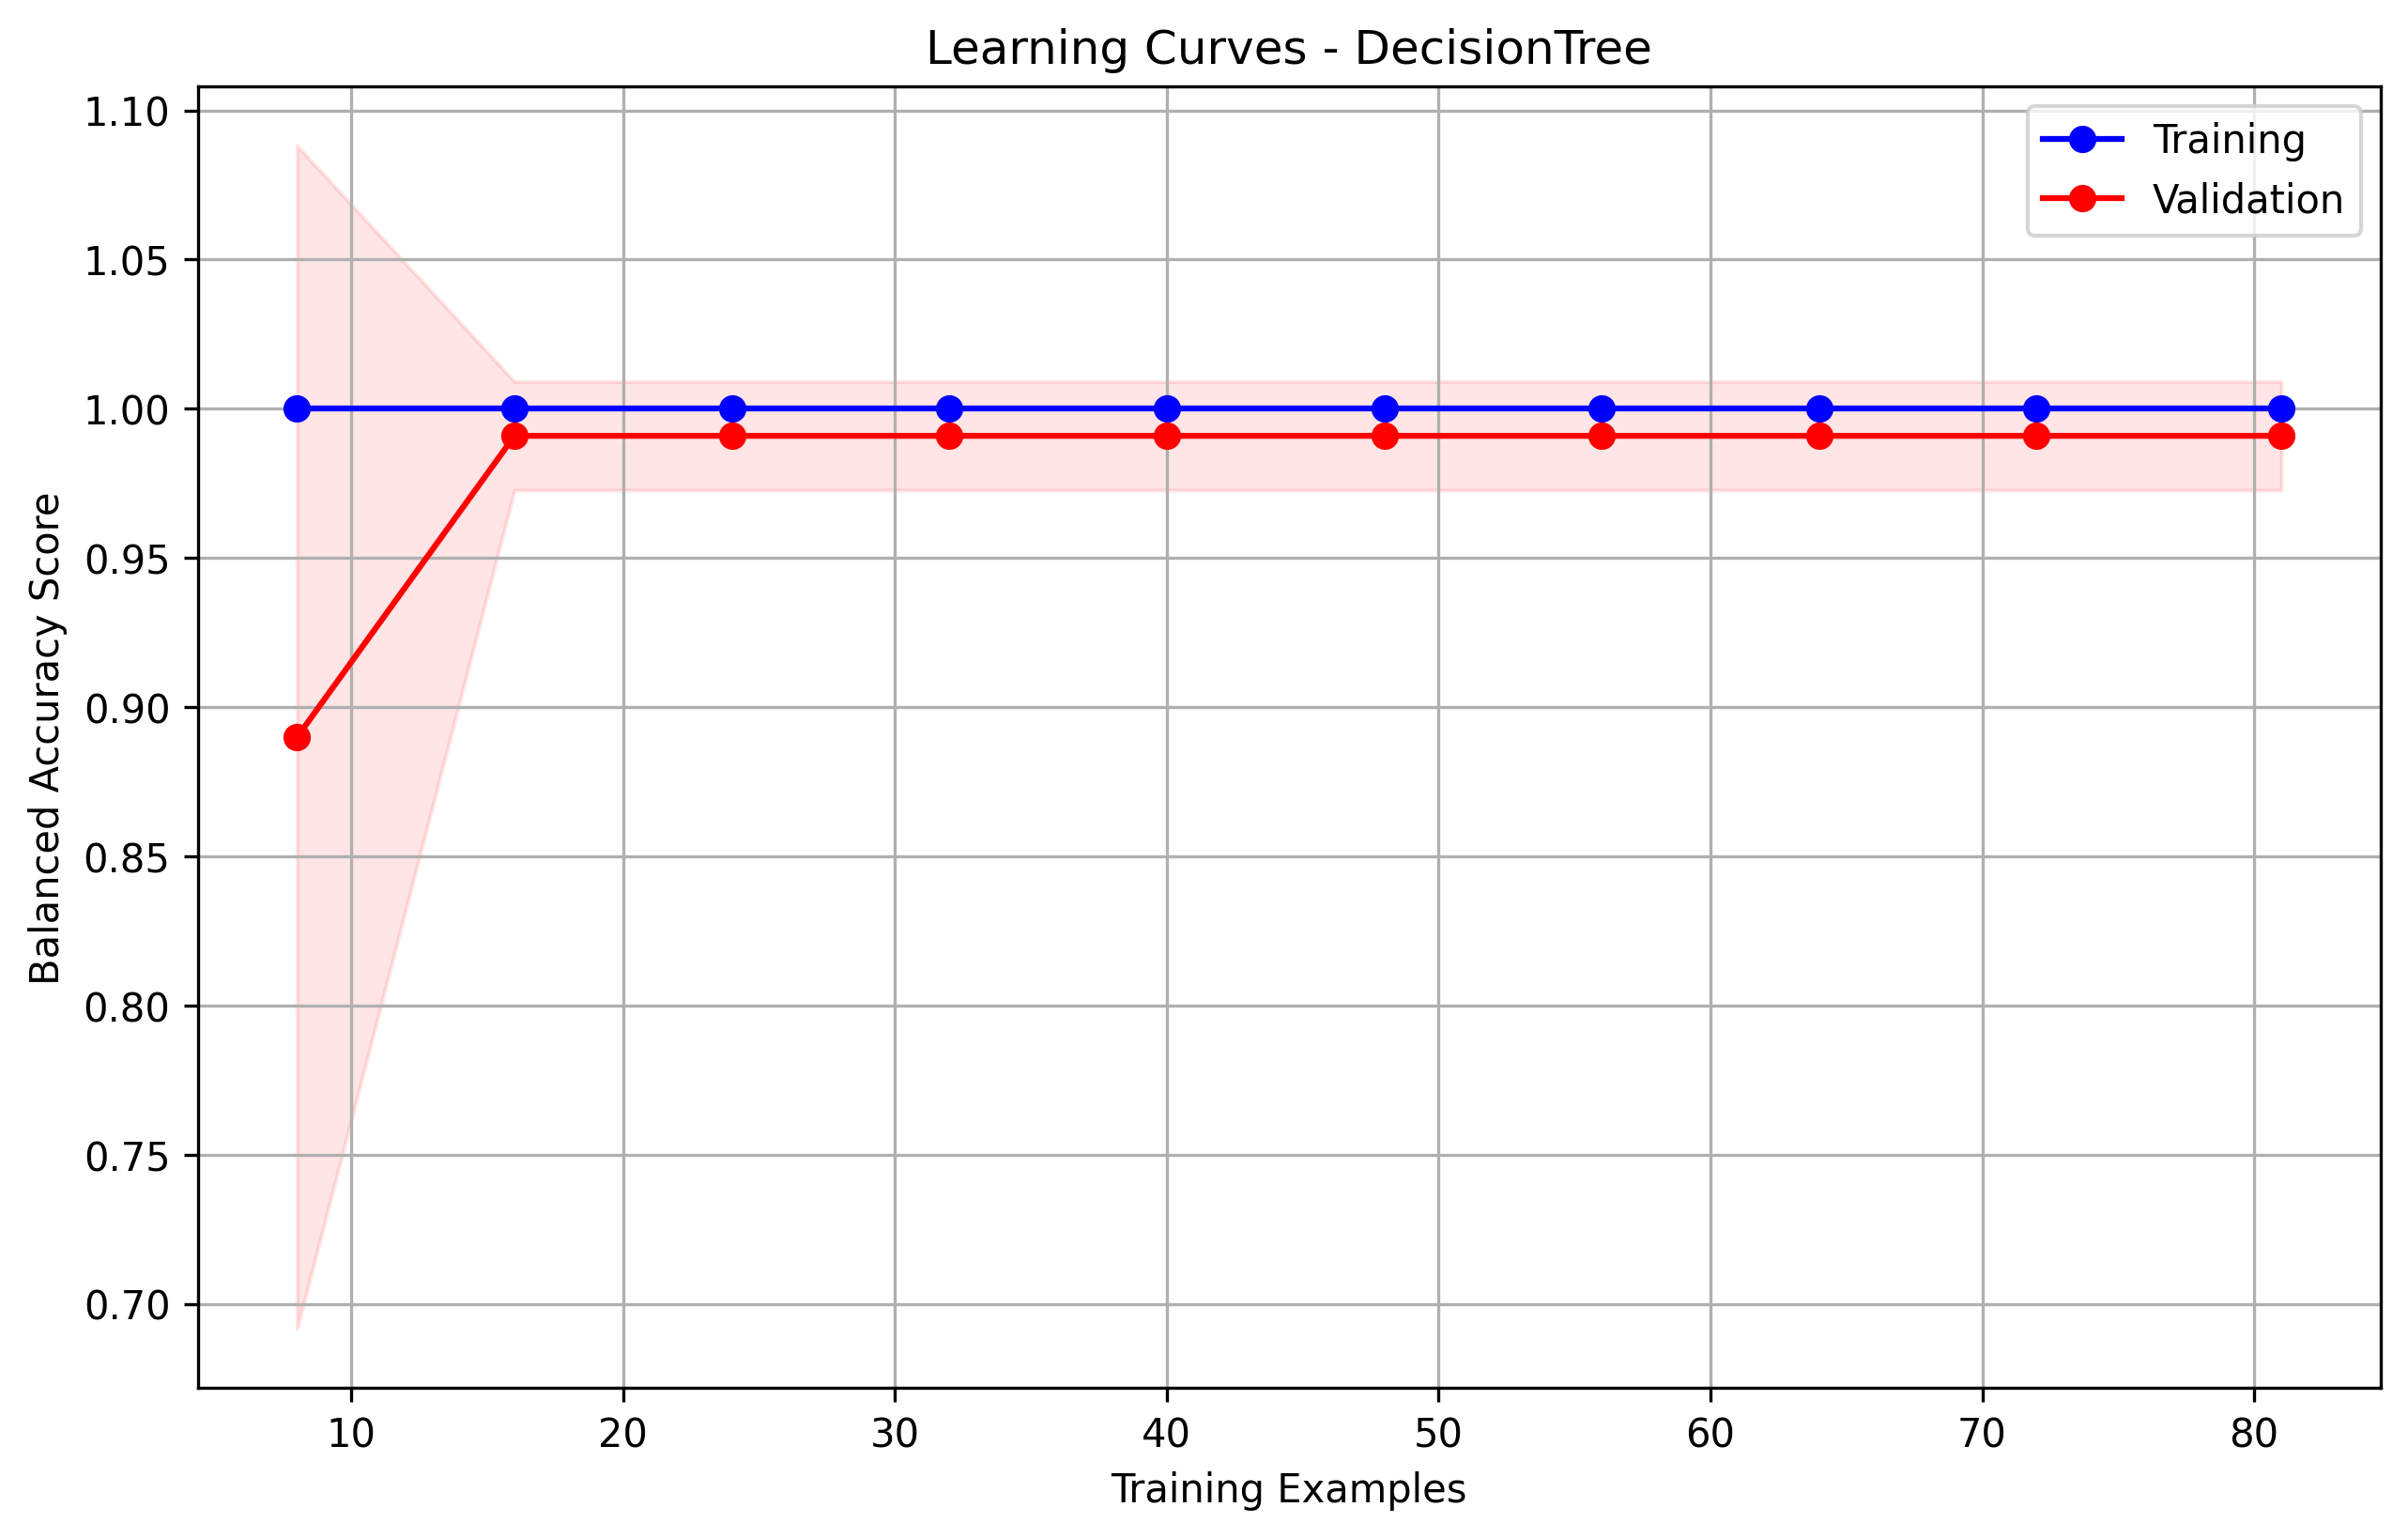

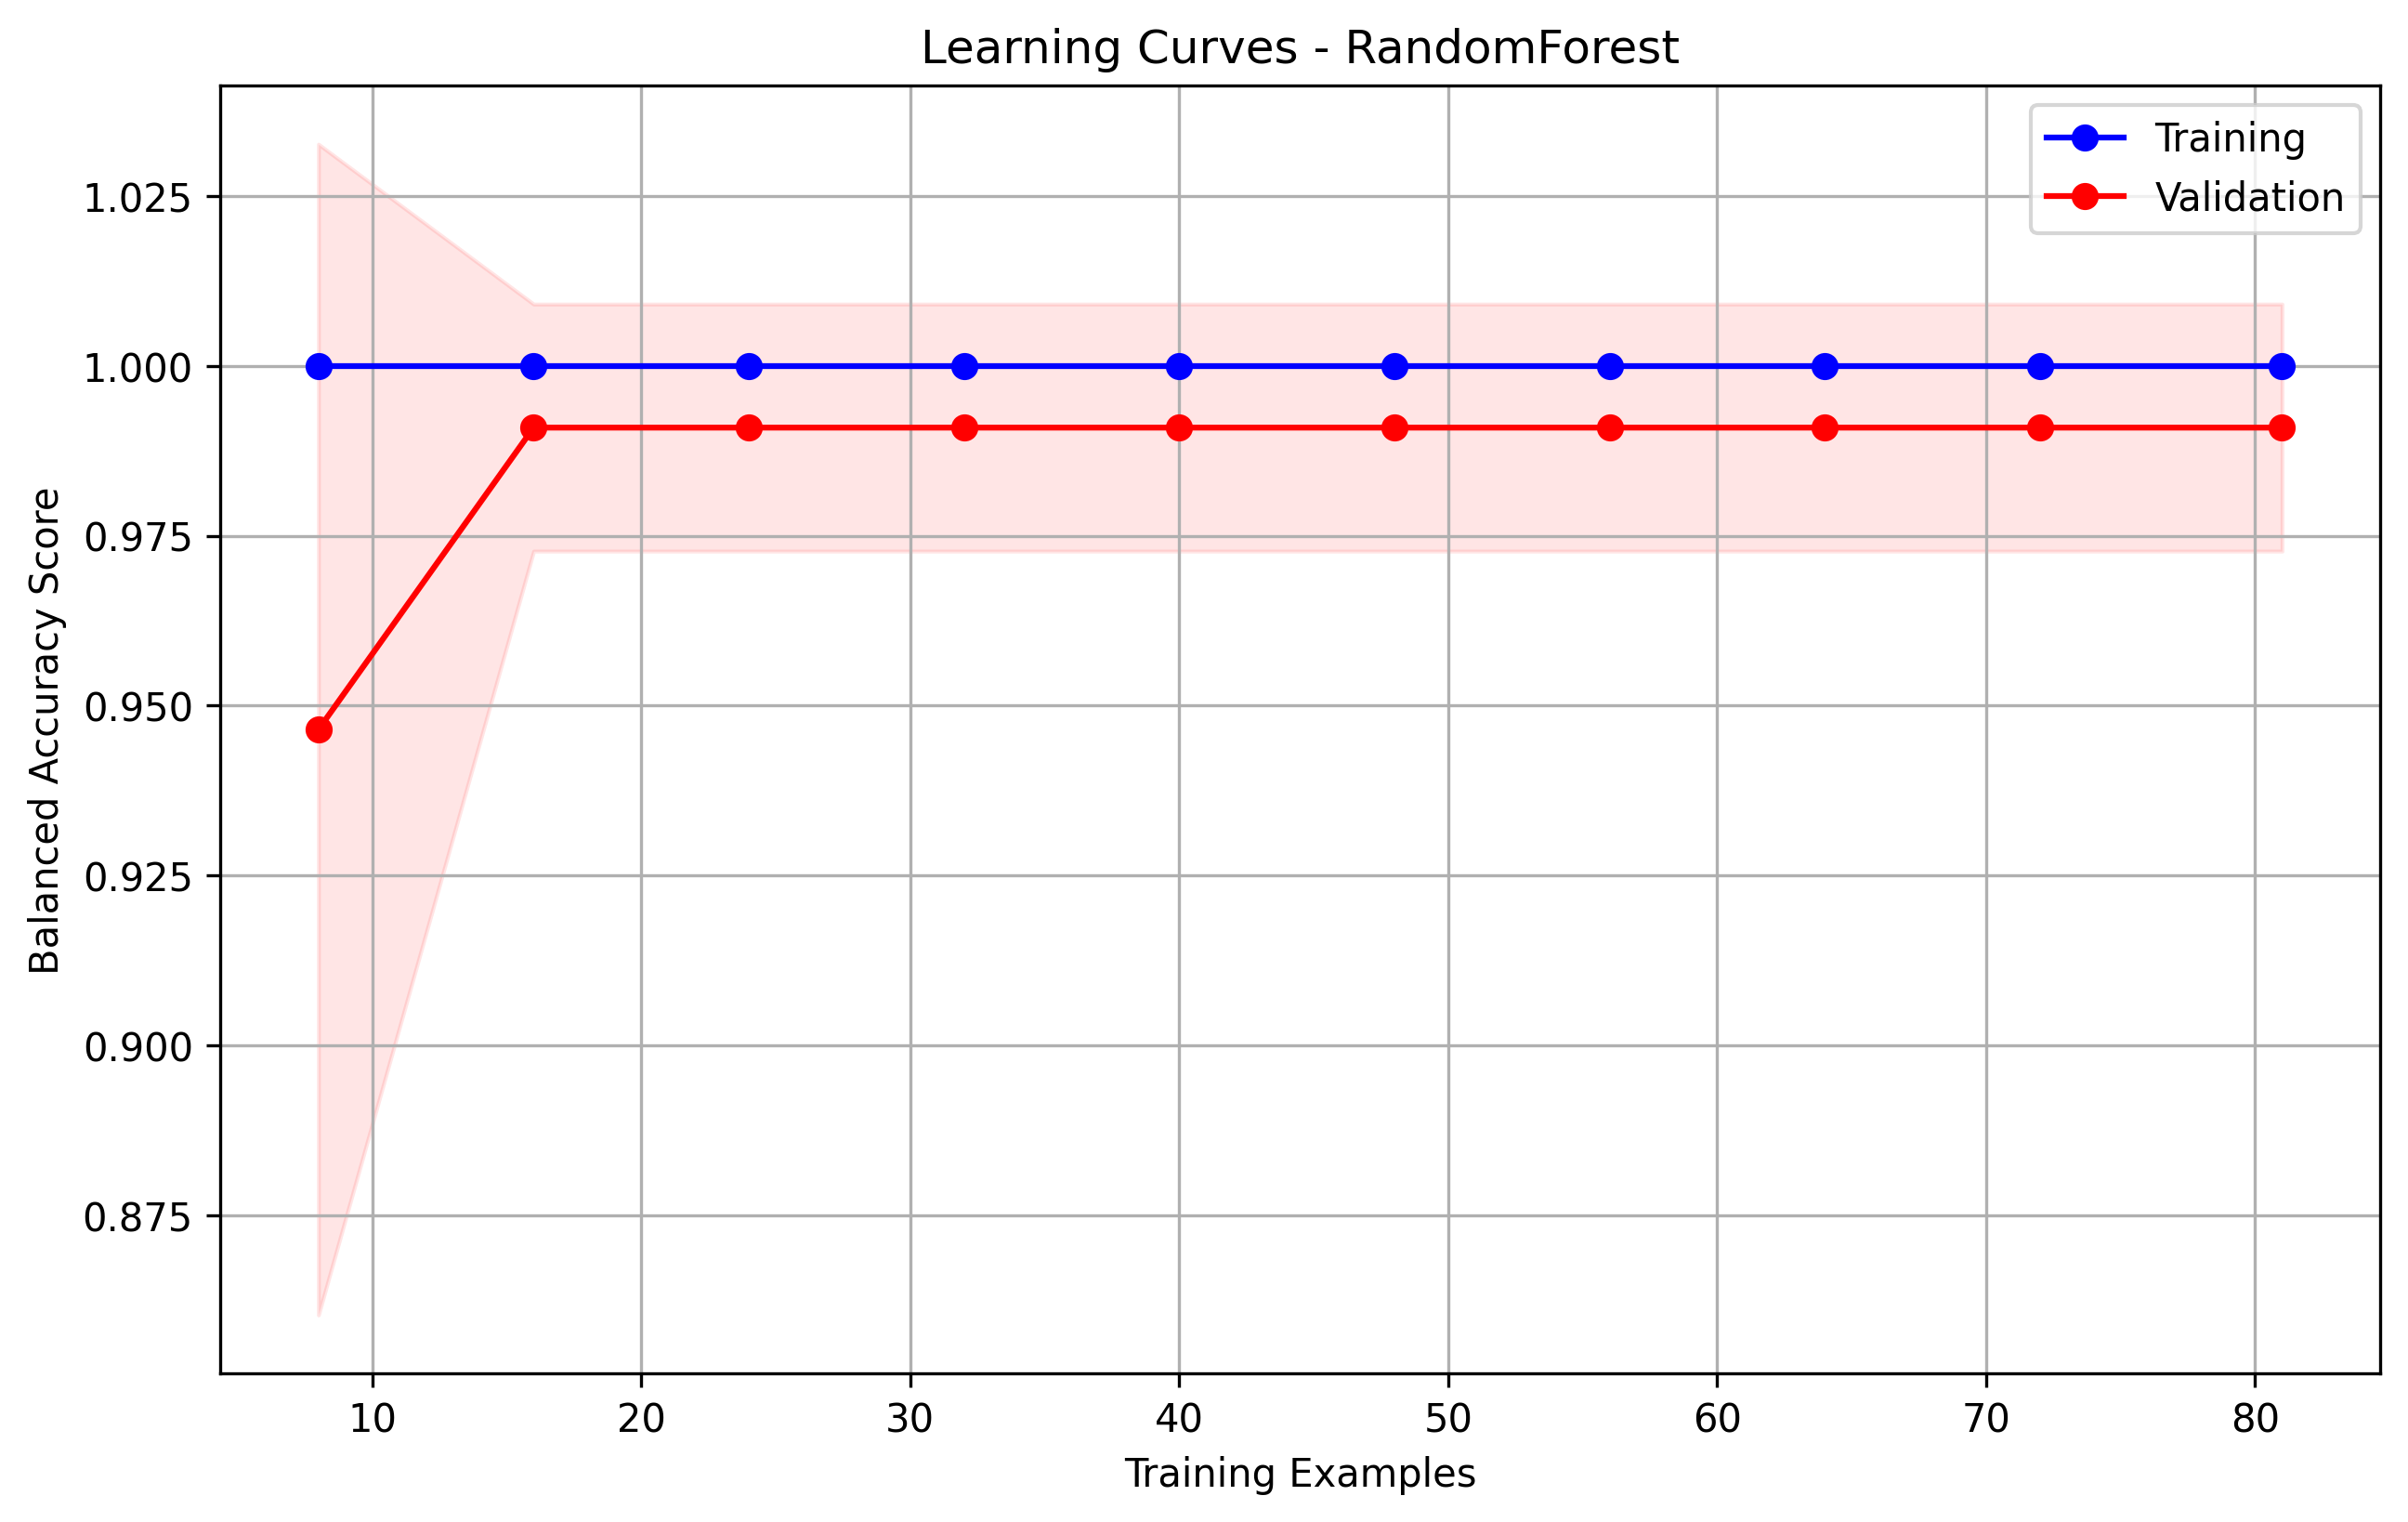

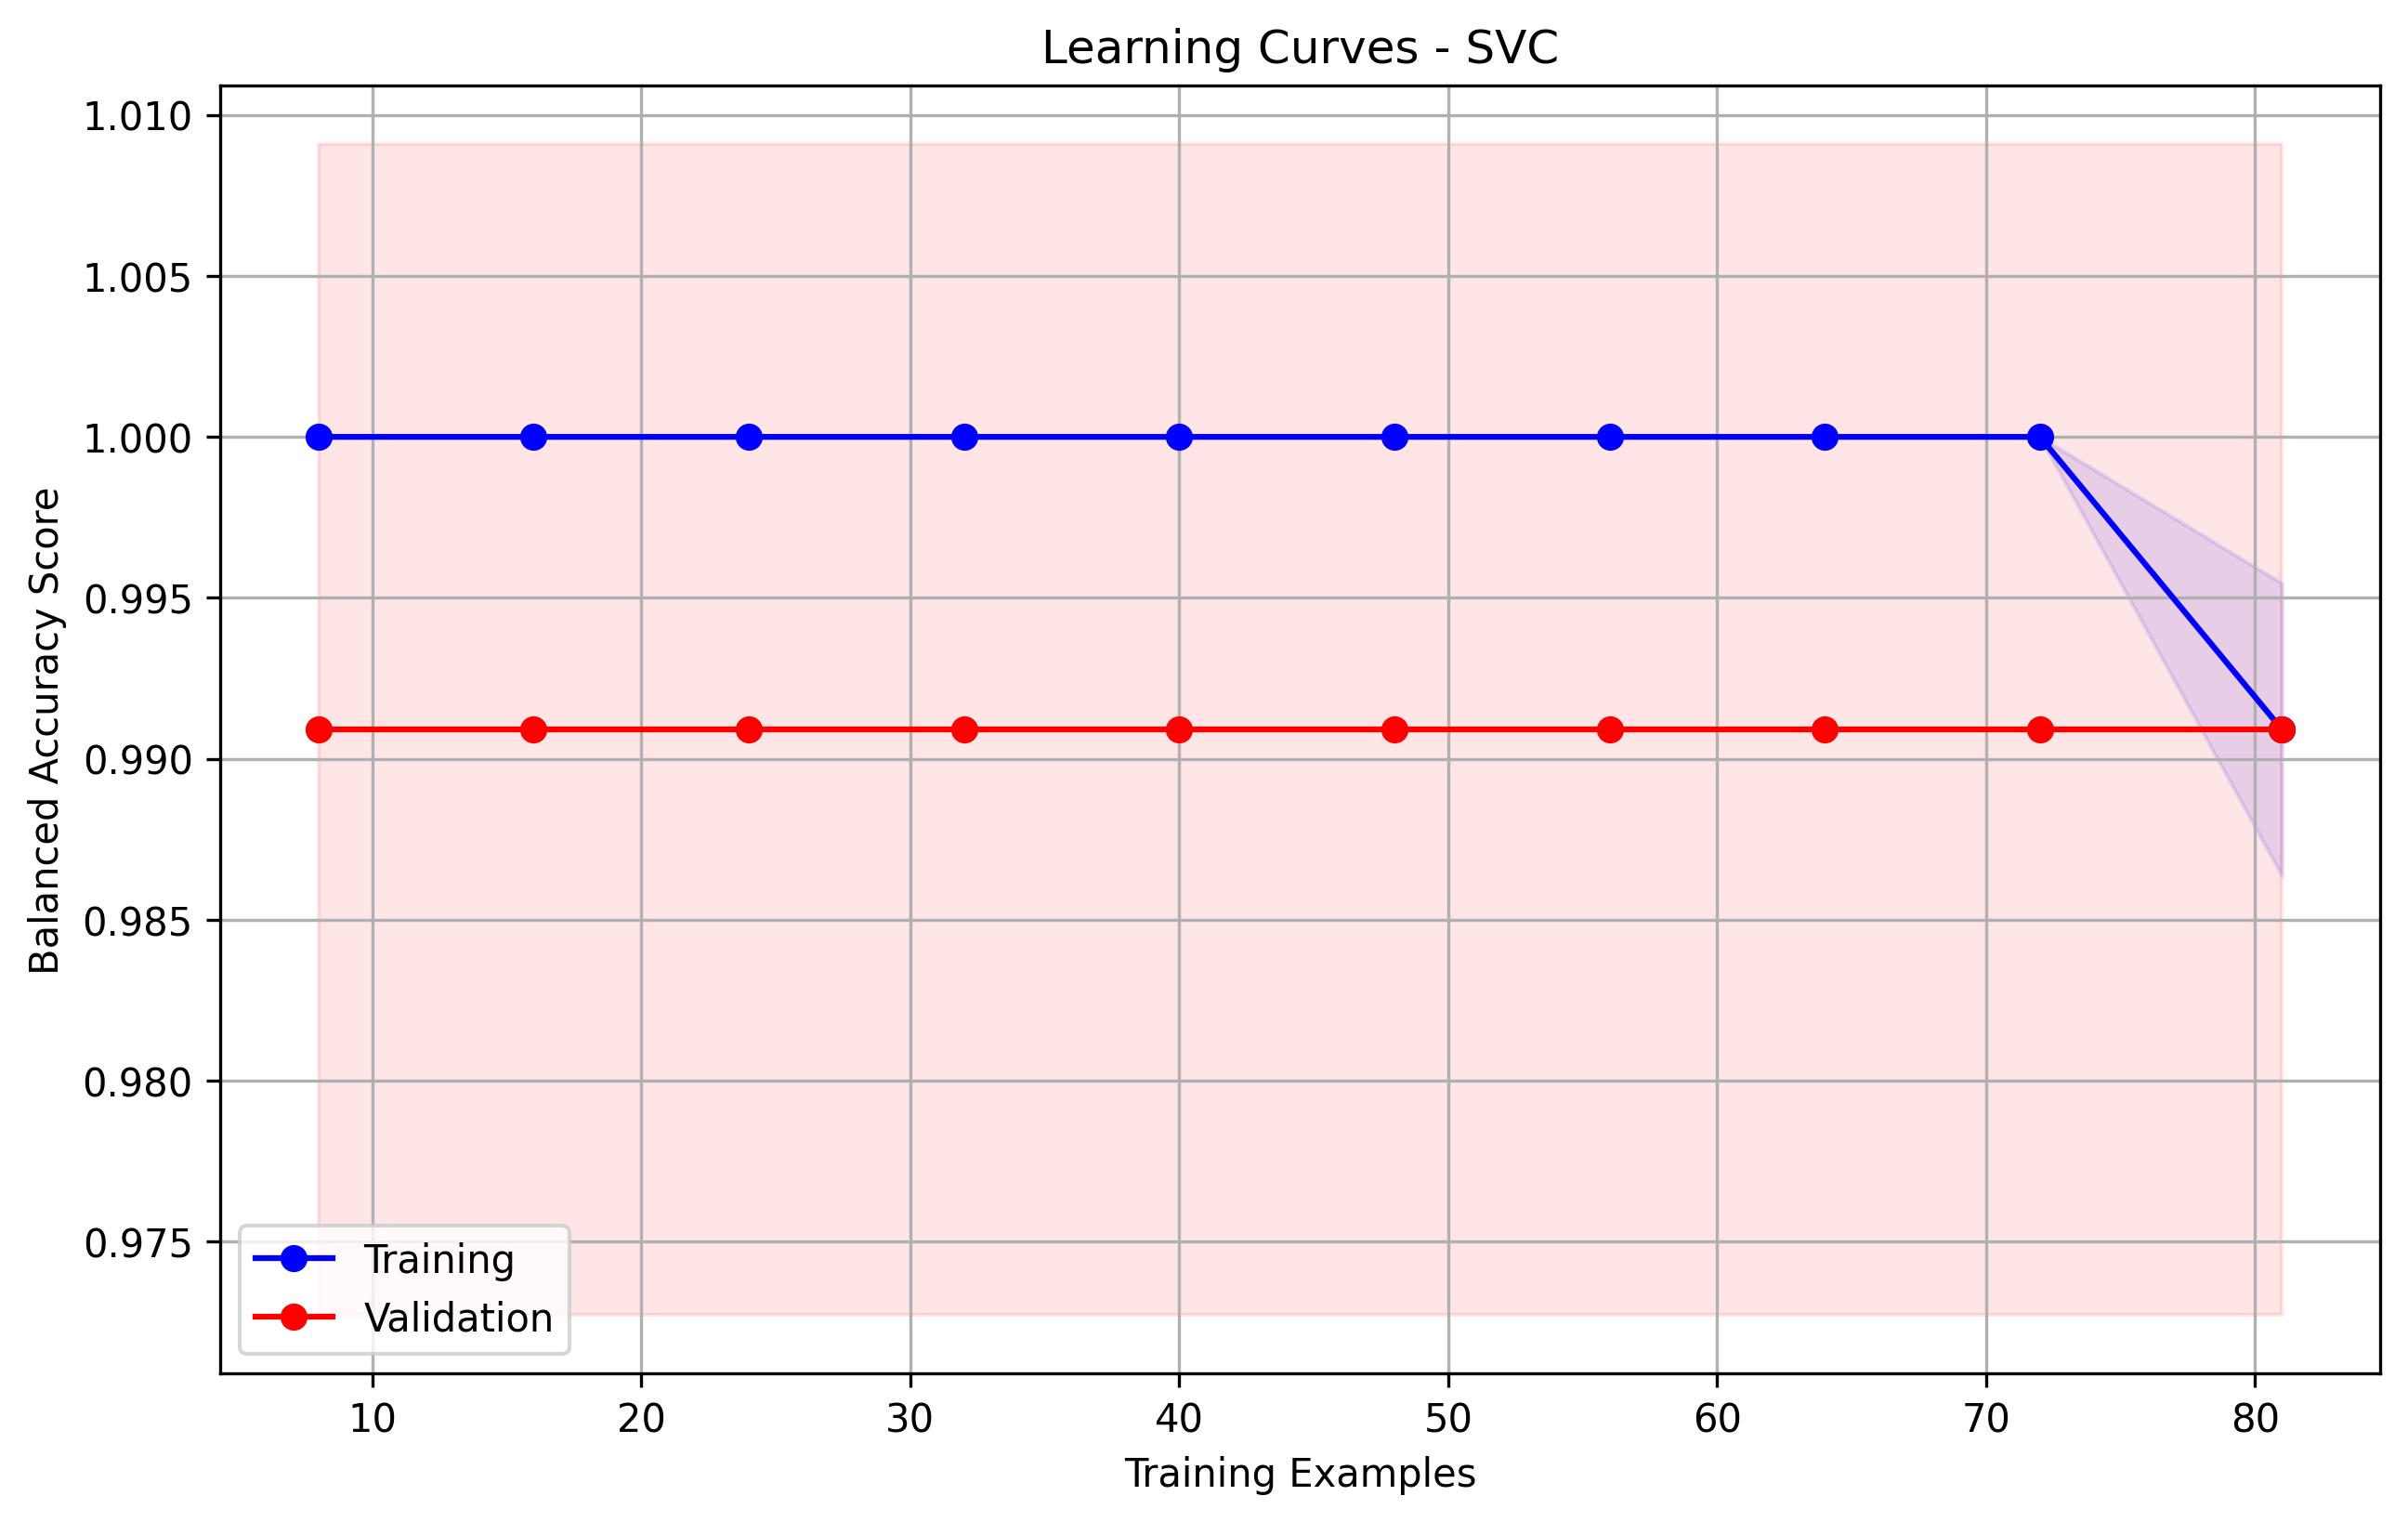

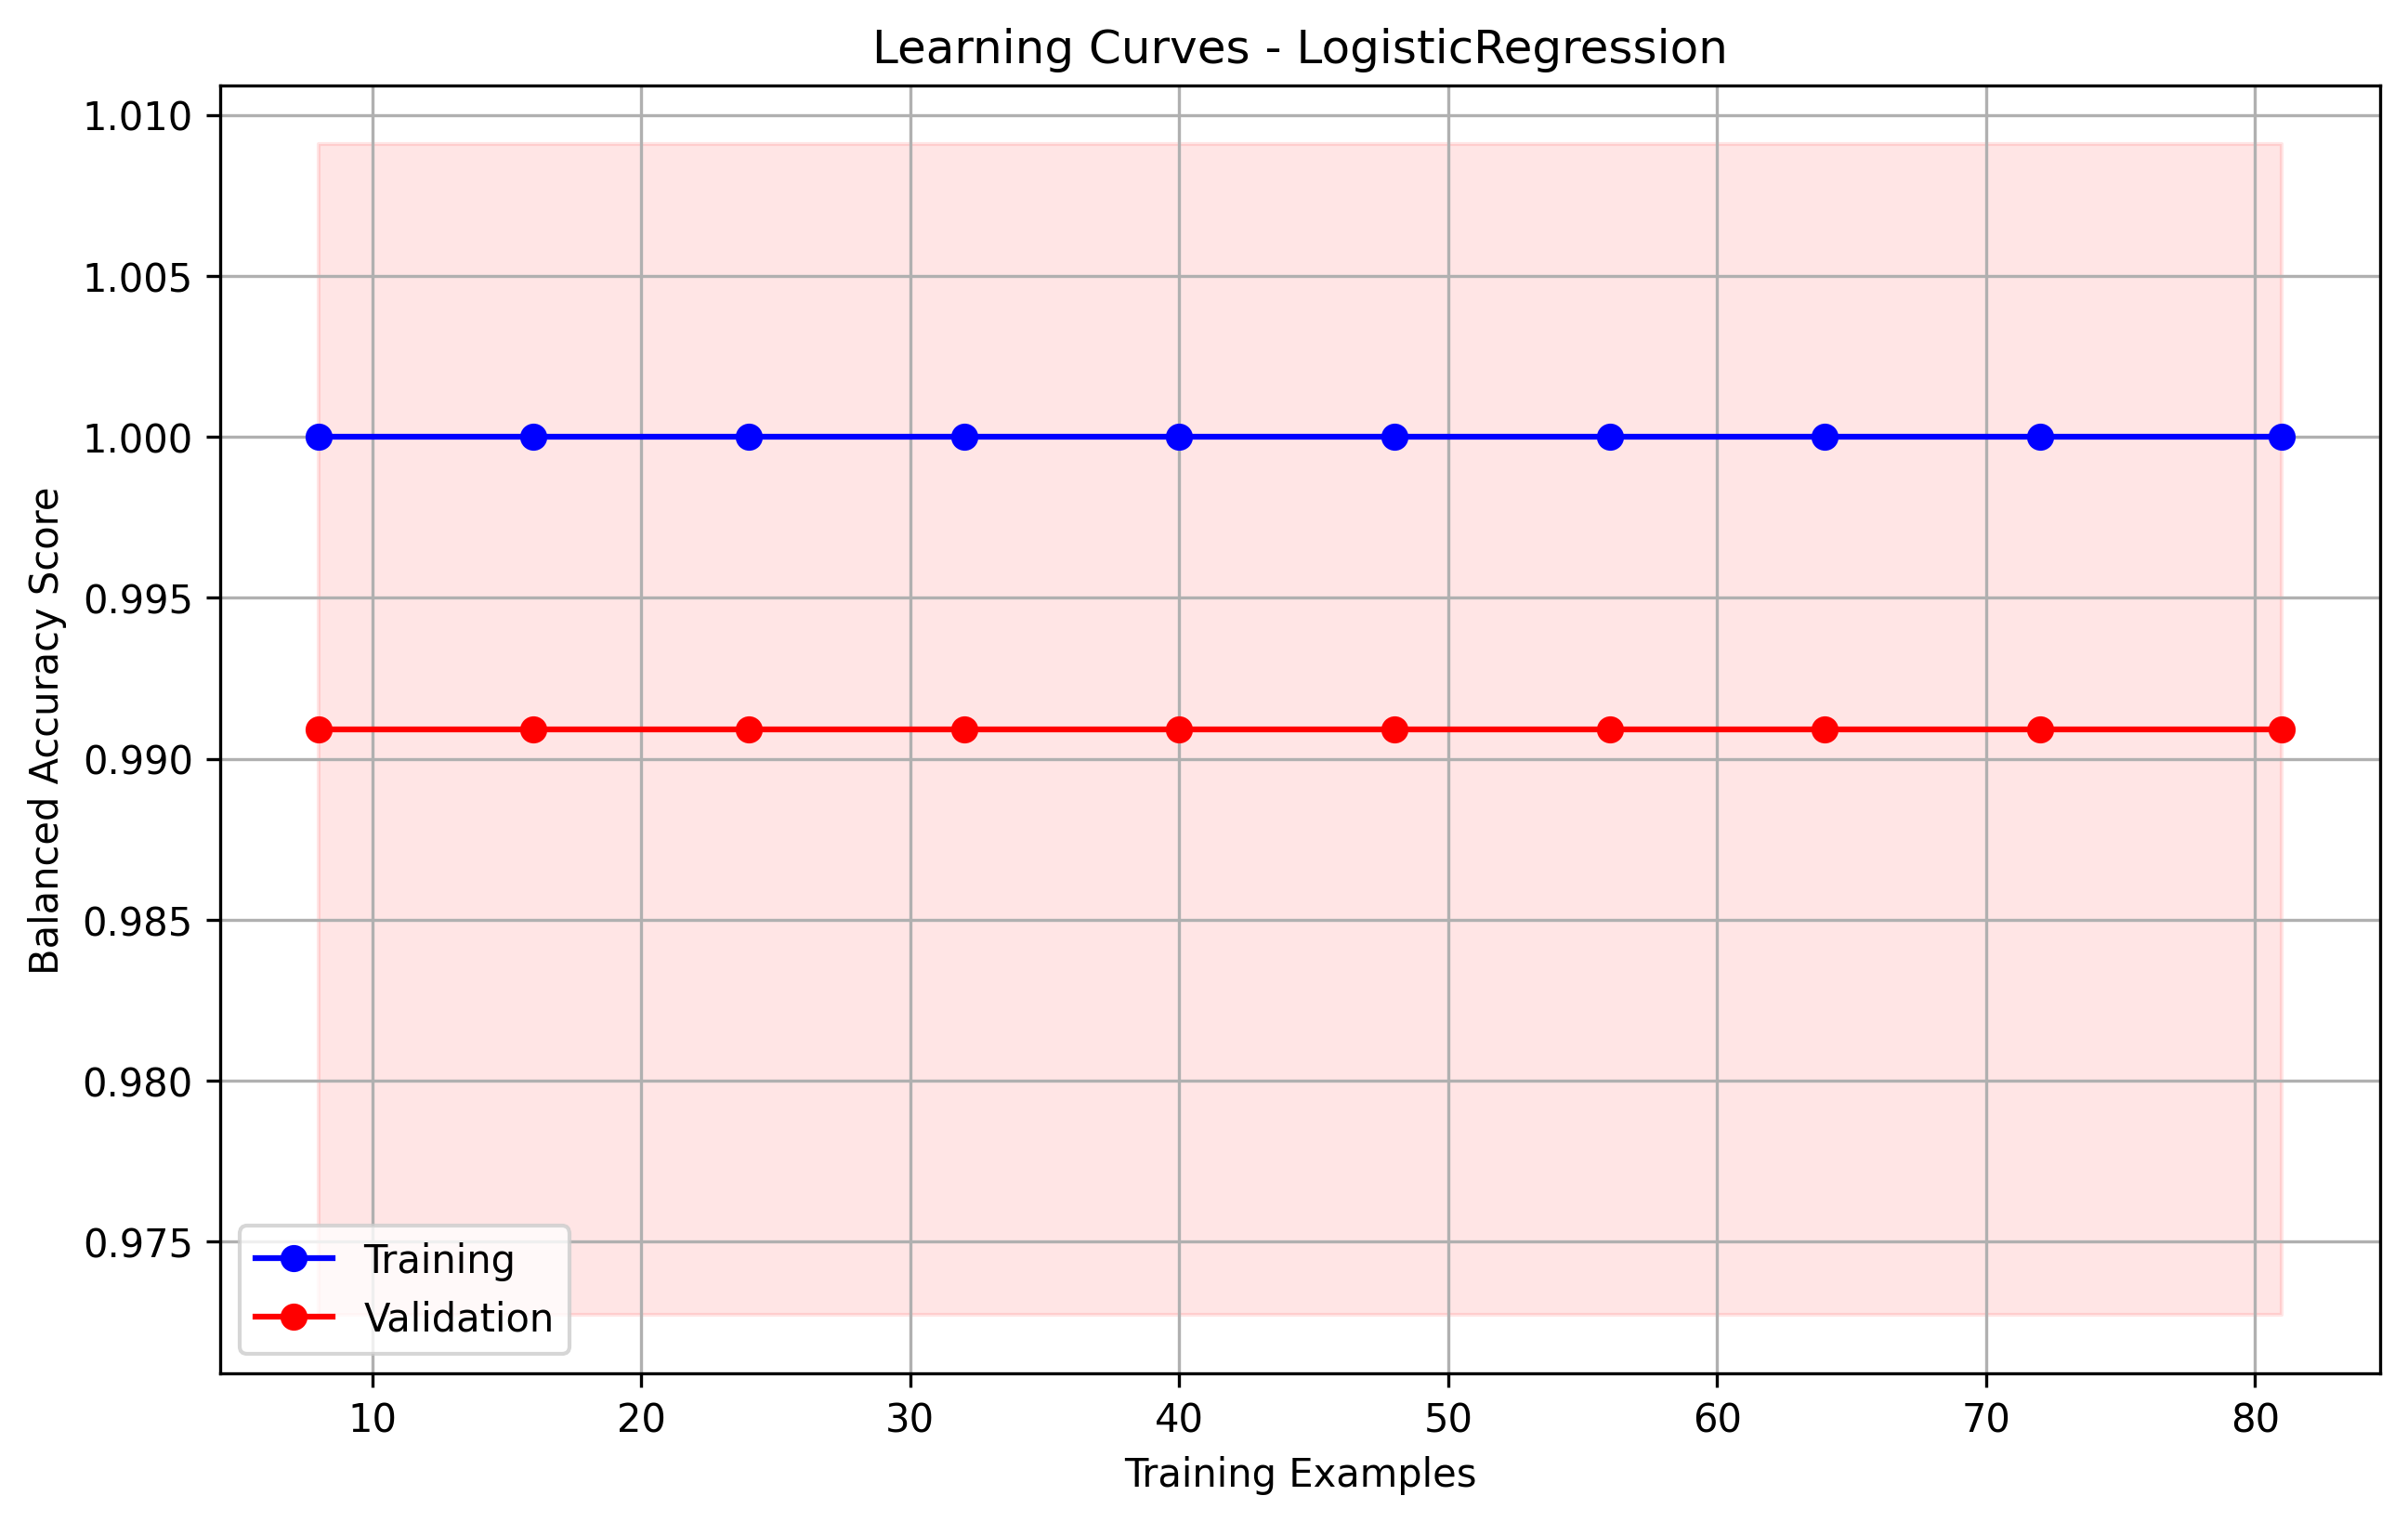

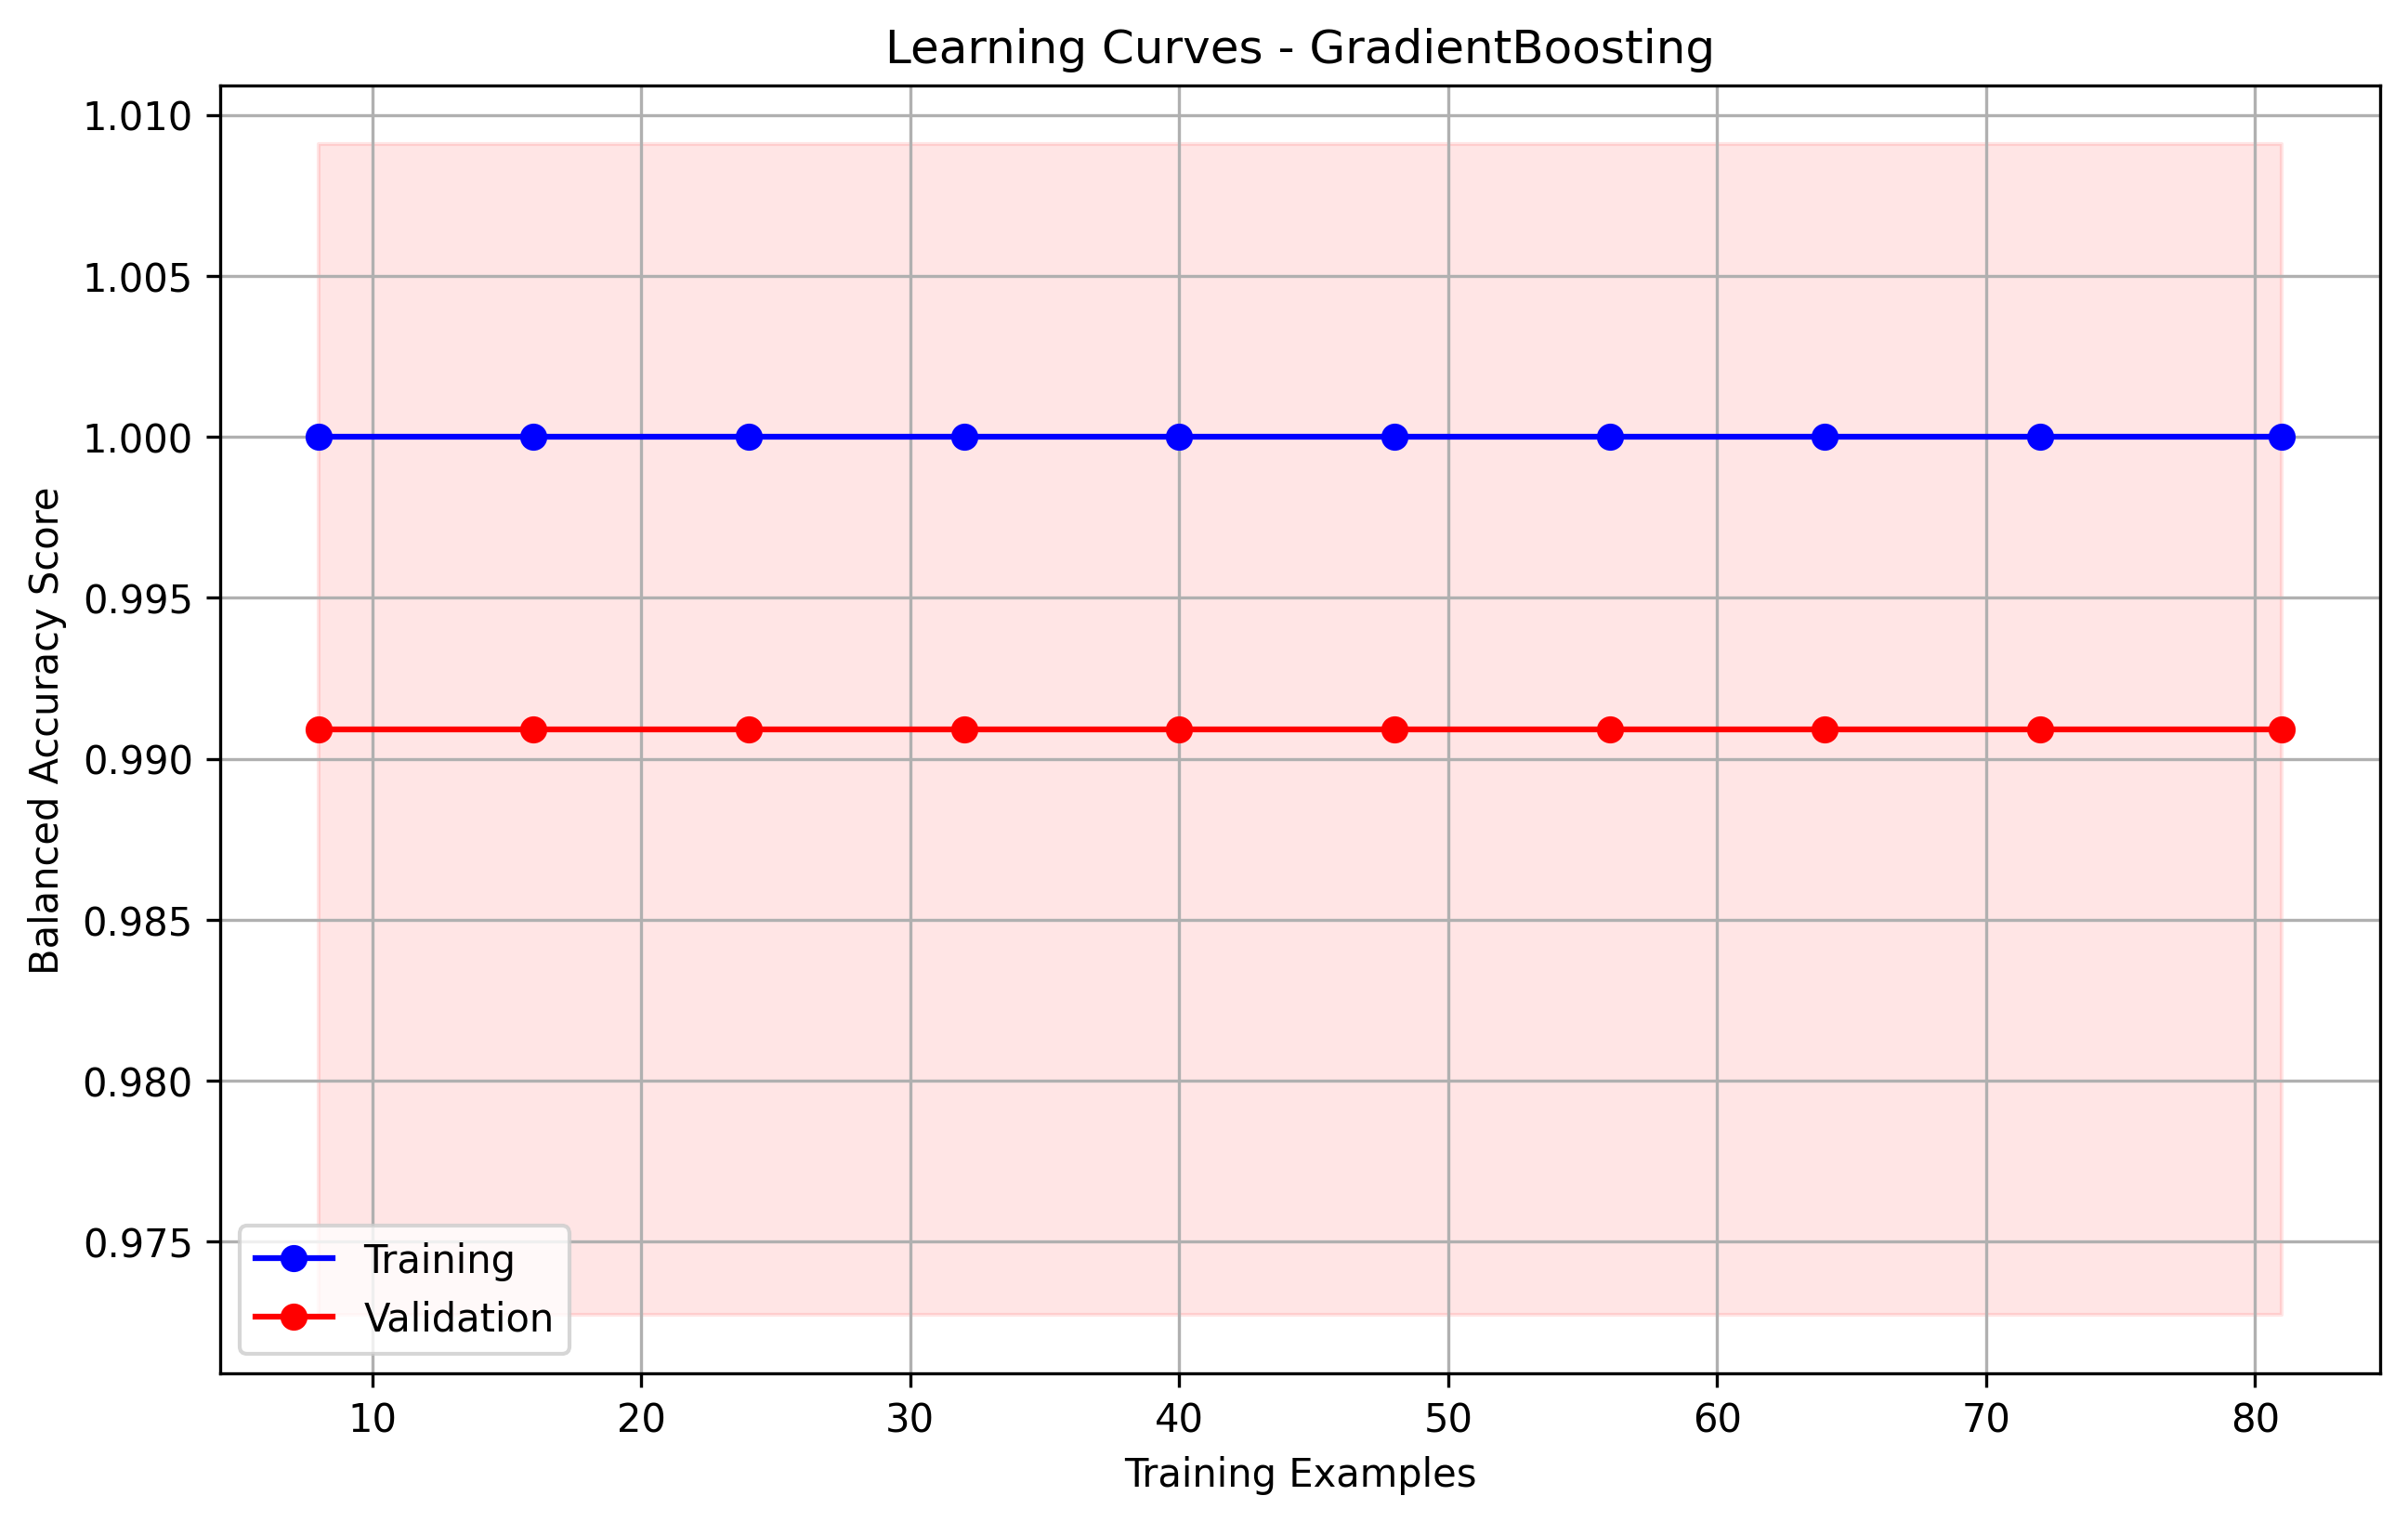

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.model_selection import StratifiedKFold, learning_curve, cross_val_score
import numpy as np
import seaborn as sns

for name, clf in classifiers.items():
    
    # Generate learning curves with stratified k-fold CV
    # Use balanced accuracy for imbalanced classes 
    # Balanced accuracy averages the accuracy for playoff and non-playoff predictions separately 
    # This prevents the model from getting a high score by just predicting the majority class
   train_sizes, train_scores, val_scores = learning_curve(
       clf, x_train, y_train,
       cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42), # Use stratified splitting with shuffling
       n_jobs=-1,  
       train_sizes=np.linspace(0.1, 1.0, 10),  # Training set sizes from 10% to 100%
    
       scoring='balanced_accuracy'  

   )

   plt.figure(figsize=(10, 6))
   
   # Plot training and validation scores
   plt.plot(train_sizes, np.mean(train_scores, axis=1), 'b-', label='Training', marker='o')
   plt.plot(train_sizes, np.mean(val_scores, axis=1), 'r-', label='Validation', marker='o')

   # Add standard deviation bands for training scores
   plt.fill_between(train_sizes, 
                   np.mean(train_scores, axis=1) - np.std(train_scores, axis=1),
                   np.mean(train_scores, axis=1) + np.std(train_scores, axis=1), 
                   alpha=0.1, color='blue')
   
   # Add standard deviation bands for validation scores
   plt.fill_between(train_sizes, 
                   np.mean(val_scores, axis=1) - np.std(val_scores, axis=1),
                   np.mean(val_scores, axis=1) + np.std(val_scores, axis=1), 
                   alpha=0.1, color='red')

   # Add plot labels and styling
   plt.title(f'Learning Curves - {name}')
   plt.xlabel('Training Examples')
   plt.ylabel('Balanced Accuracy Score')
   plt.legend(loc='best')
   plt.grid(True)
   plt.show()